<a href="https://www.kaggle.com/code/himanshu9648/time-series-analysis-of-crop-prices-in-india?scriptVersionId=232253052" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [84]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/crop-price-prediction-dataset-in-india/crop_price_dataset.csv


In [85]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import warnings  

# Ignore all warnings  
warnings.filterwarnings("ignore")  

In [86]:
df = pd.read_csv('/kaggle/input/crop-price-prediction-dataset-in-india/crop_price_dataset.csv')

In [87]:
df.head()

month commodity_name  avg_modal_price  avg_min_price  avg_max_price  \
0  2025-03-01          Maize          2341.58        2191.23        2402.98   
1  2025-02-01          Maize          2356.01        2202.35        2414.46   
2  2025-01-01          Maize          2382.20        2221.31        2448.22   
3  2024-12-01          Maize          2328.78        2164.86        2411.66   
4  2024-11-01          Maize          2273.46        2077.63        2377.78   

  state_name district_name calculationType  change  
0      India           All         Monthly  -14.43  
1      India           All         Monthly  -26.19  
2      India           All         Monthly   53.42  
3      India           All         Monthly   55.32  
4      India           All         Monthly   35.48

In [88]:
# reverse the dataFrame 
df  = df.iloc[::-1].reset_index(drop=True)
df.tail()

month commodity_name  avg_modal_price  avg_min_price  \
2805  2024-11-01          Maize          2273.46        2077.63   
2806  2024-12-01          Maize          2328.78        2164.86   
2807  2025-01-01          Maize          2382.20        2221.31   
2808  2025-02-01          Maize          2356.01        2202.35   
2809  2025-03-01          Maize          2341.58        2191.23   

      avg_max_price state_name district_name calculationType  change  
2805        2377.78      India           All         Monthly   35.48  
2806        2411.66      India           All         Monthly   55.32  
2807        2448.22      India           All         Monthly   53.42  
2808        2414.46      India           All         Monthly  -26.19  
2809        2402.98      India           All         Monthly  -14.43

In [89]:
df.replace({'Jowar(Sorghum)':'Sorghum' ,'Ginger(Dry)':'Ginger' ,'Barley (Jau)':'Barley' },inplace=True)

In [90]:
crops = df['commodity_name'].unique()  
crops  

array(['Coconut', 'Groundnut', 'Turmeric', 'Ginger', 'Barley', 'Millets',
       'Sorghum', 'Sunflower', 'Sugarcane', 'Tea', 'Coffee', 'Cotton',
       'Sugar', 'Rice', 'Wheat', 'Maize'], dtype=object)

In [91]:
df['month'] = pd.to_datetime(df['month'])

In [92]:
months = df[df['commodity_name'] == 'Maize']['month']
months.head()

2627   2010-01-01
2628   2010-02-01
2629   2010-03-01
2630   2010-04-01
2631   2010-05-01
Name: month, dtype: datetime64[ns]

In [93]:
import pandas as pd  
import matplotlib.pyplot as plt  

def plot_data(crop, df, ax):  
    # Filter the DataFrame for the specified crop  
    crop_data = df[df['commodity_name'] == crop]  

    # Create the plot  
    ax.plot(crop_data['month'], crop_data['avg_modal_price'], label='Avg Modal Price', marker='o')  
    ax.set_title(f'Commodity Prices Over Time ({crop})')  
    ax.set_xlabel('Month')  
    ax.set_ylabel('Price')  
    ax.set_xticks(crop_data['month'])  
    ax.legend()  
    ax.grid()  

 

# Data Visualisation

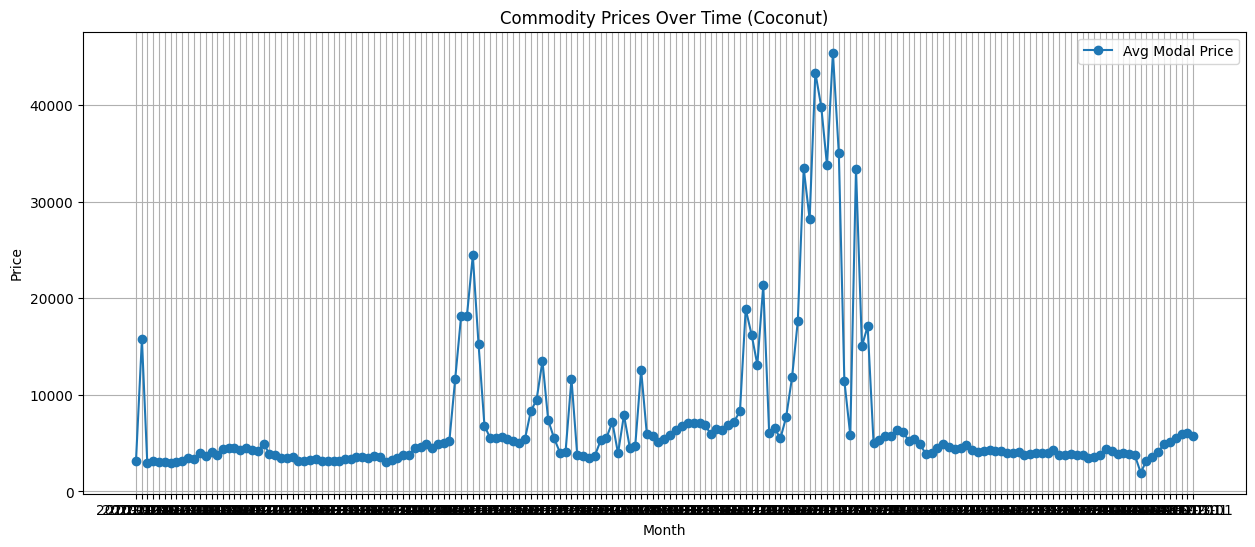

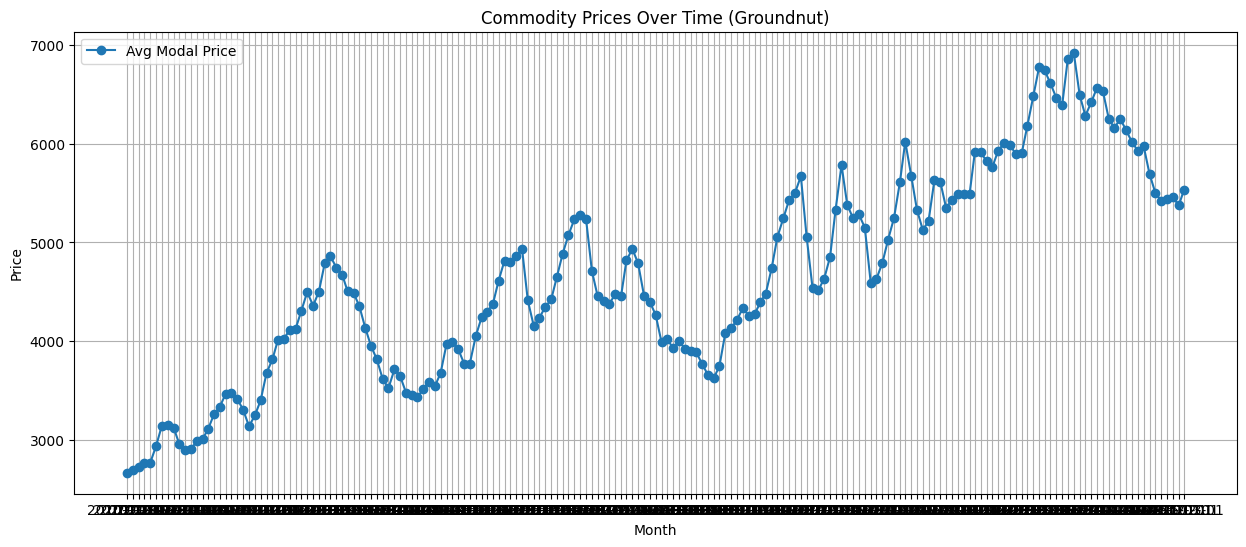

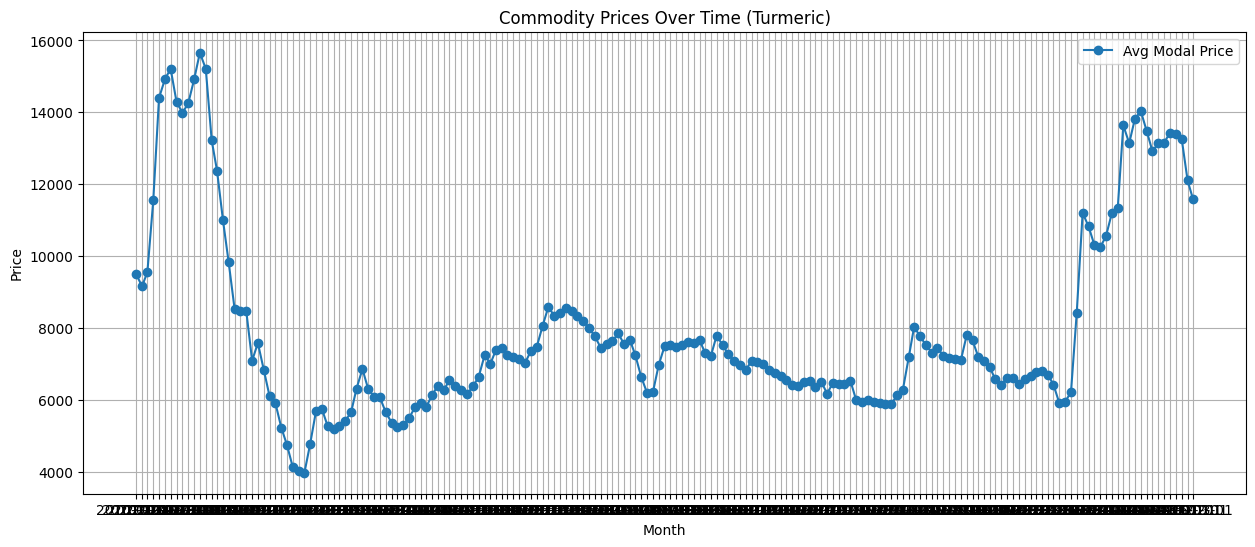

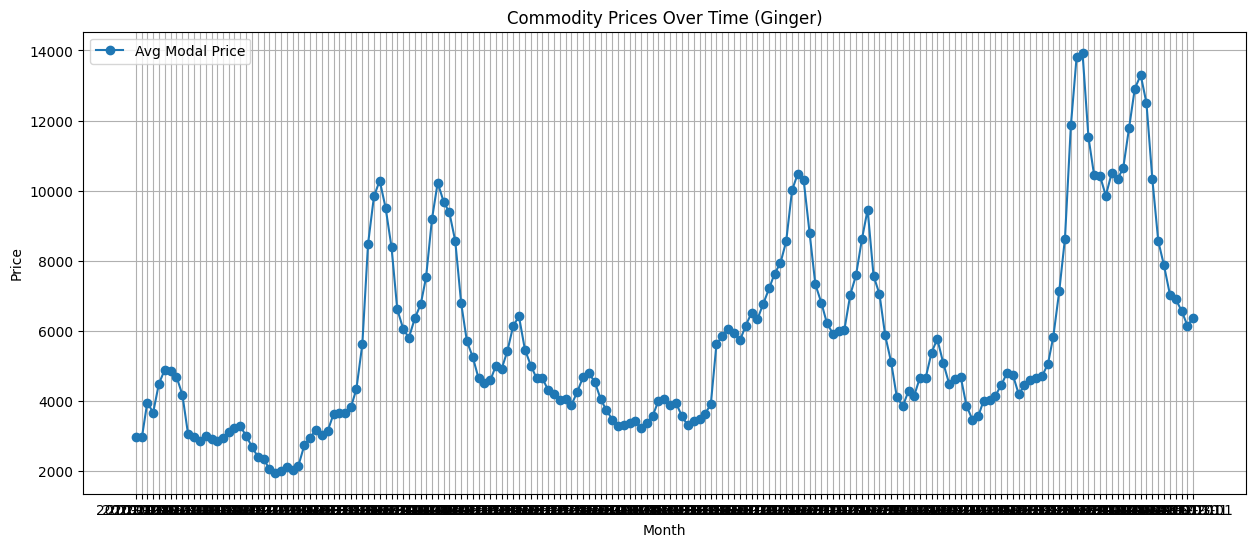

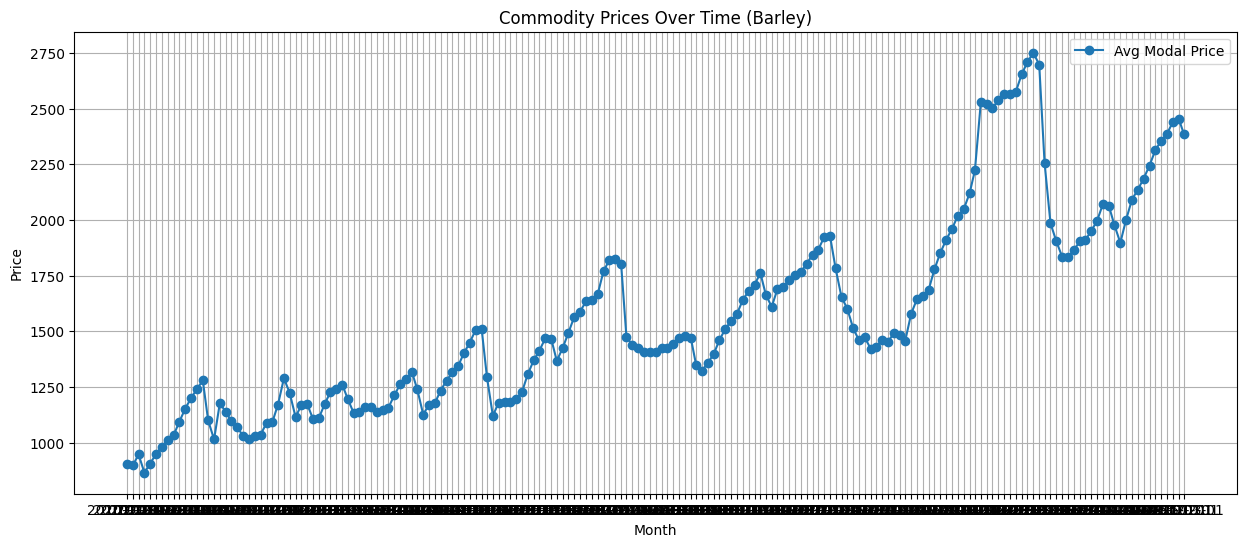

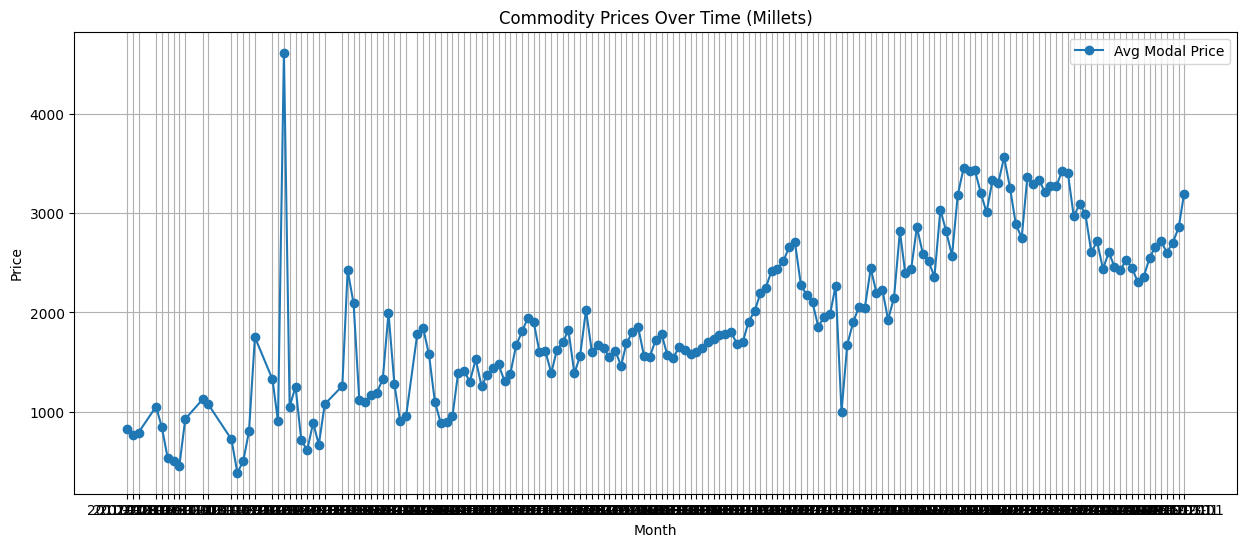

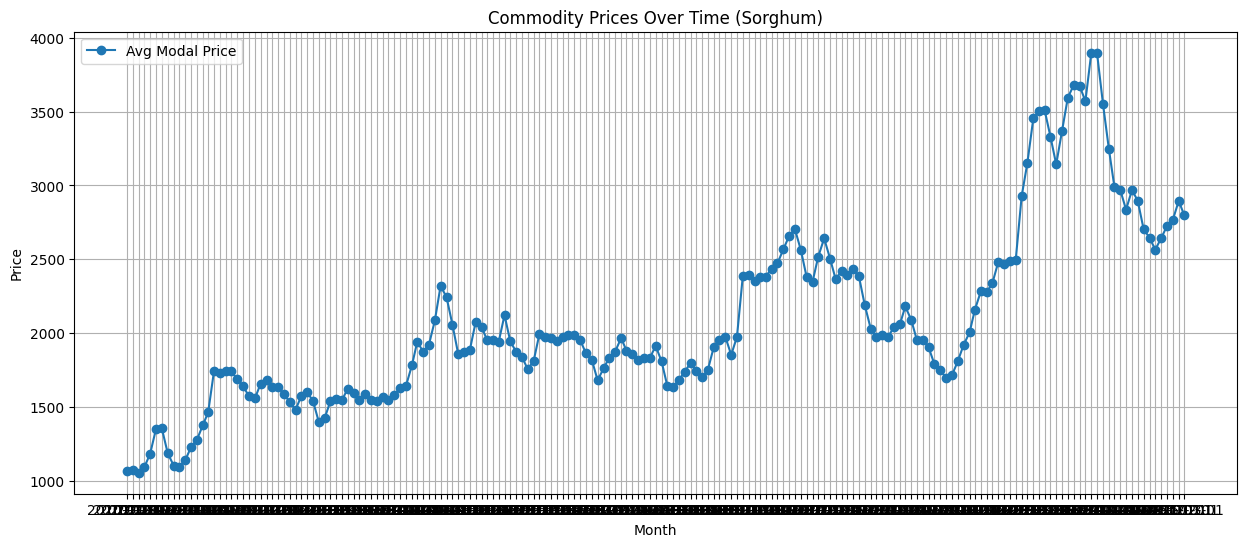

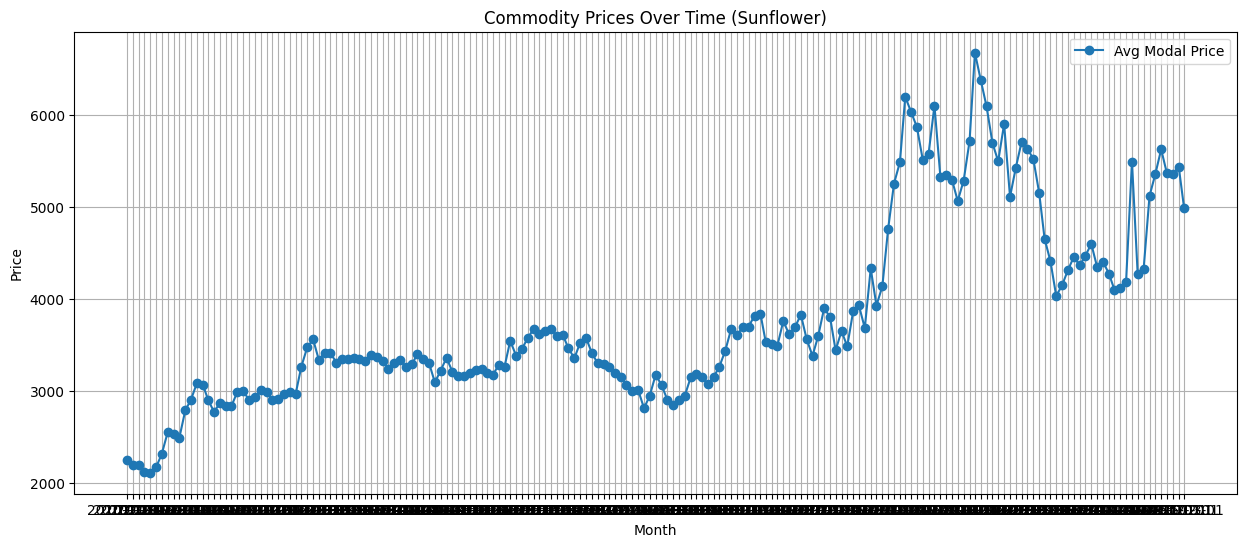

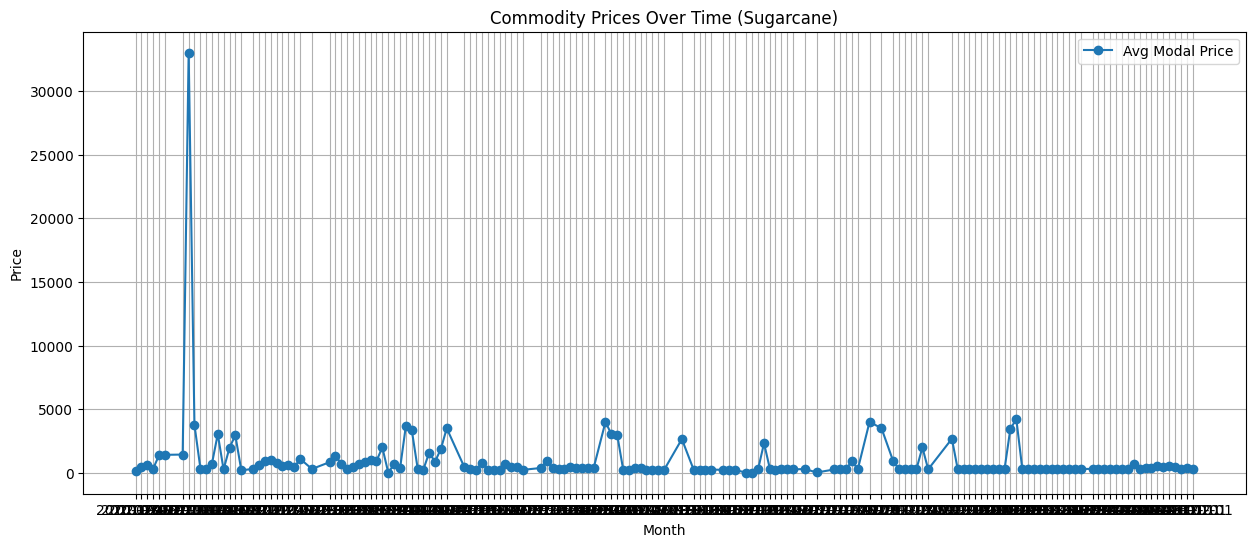

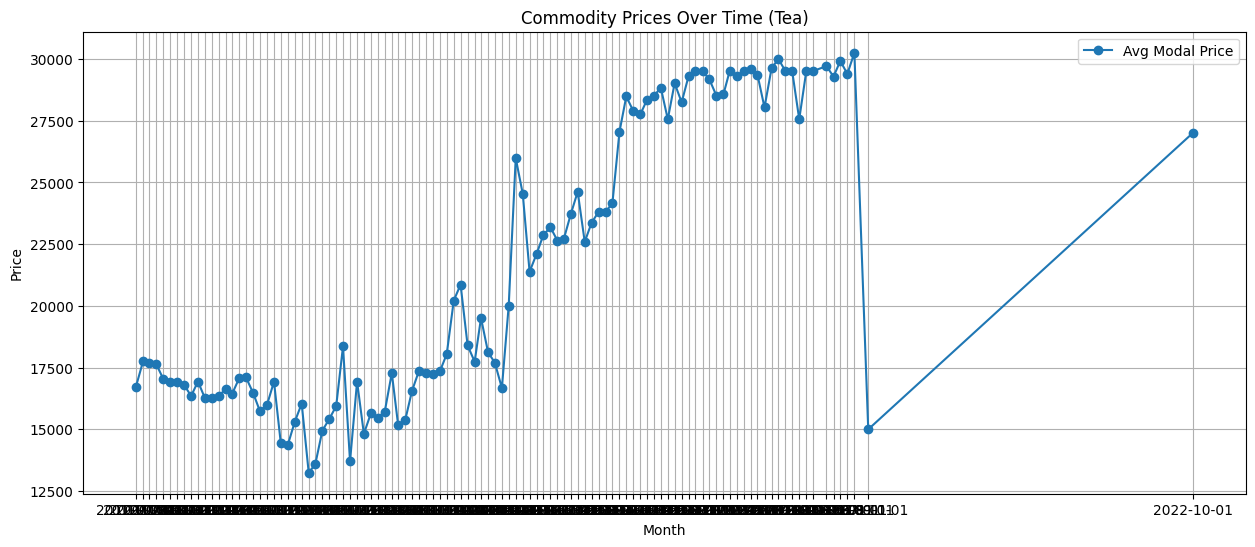

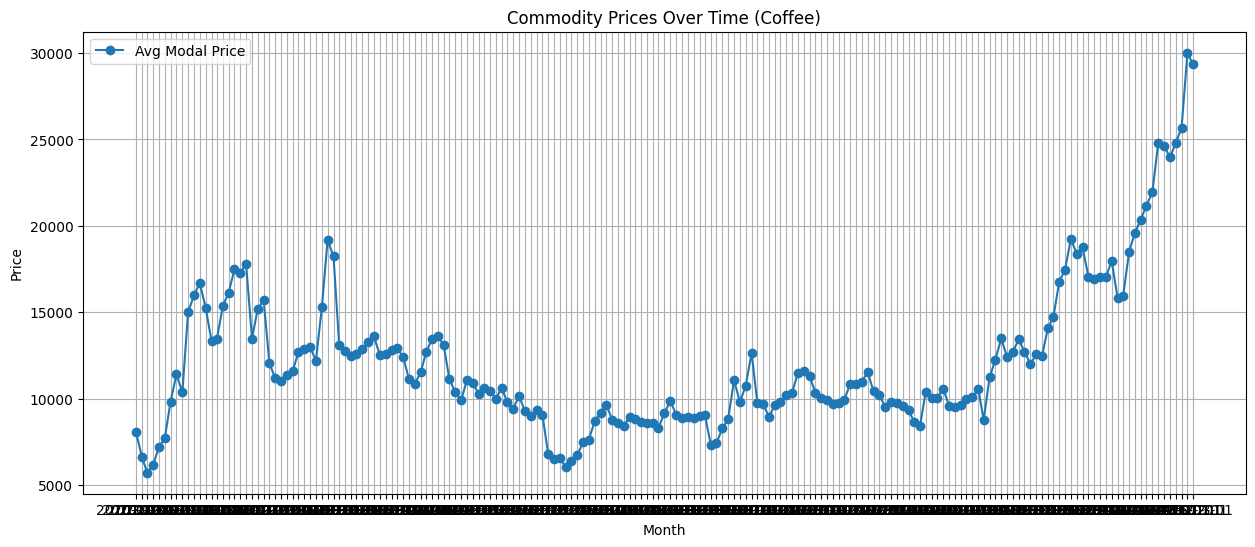

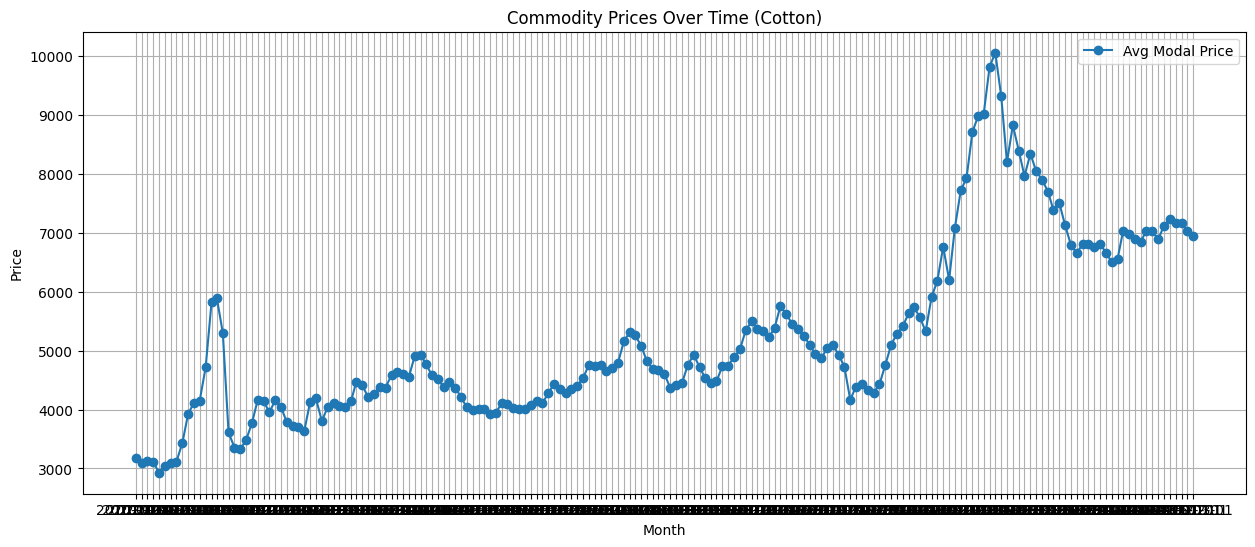

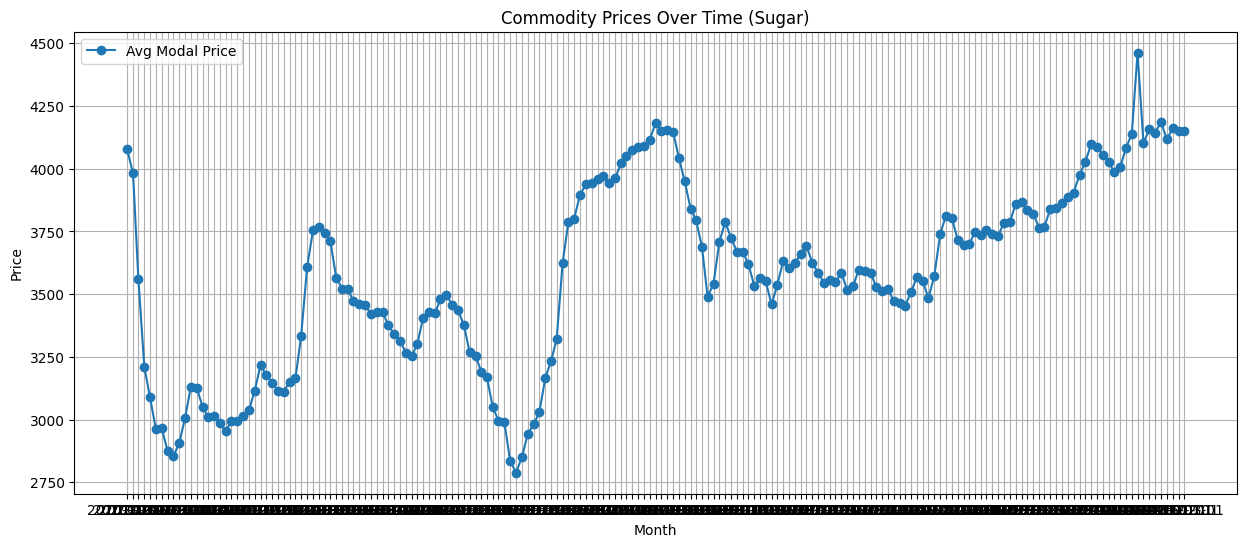

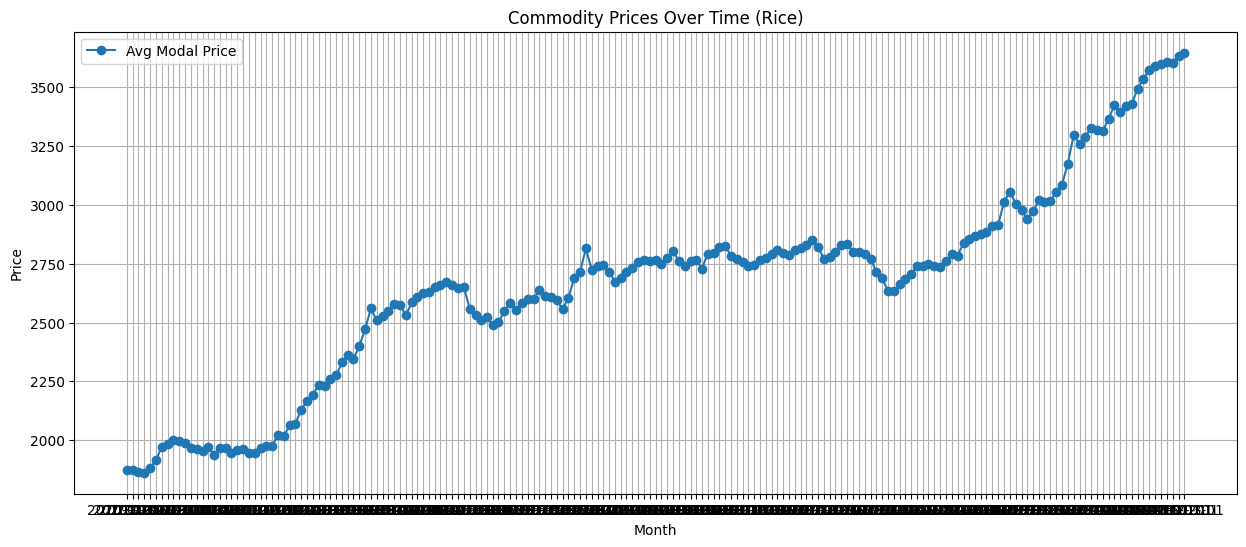

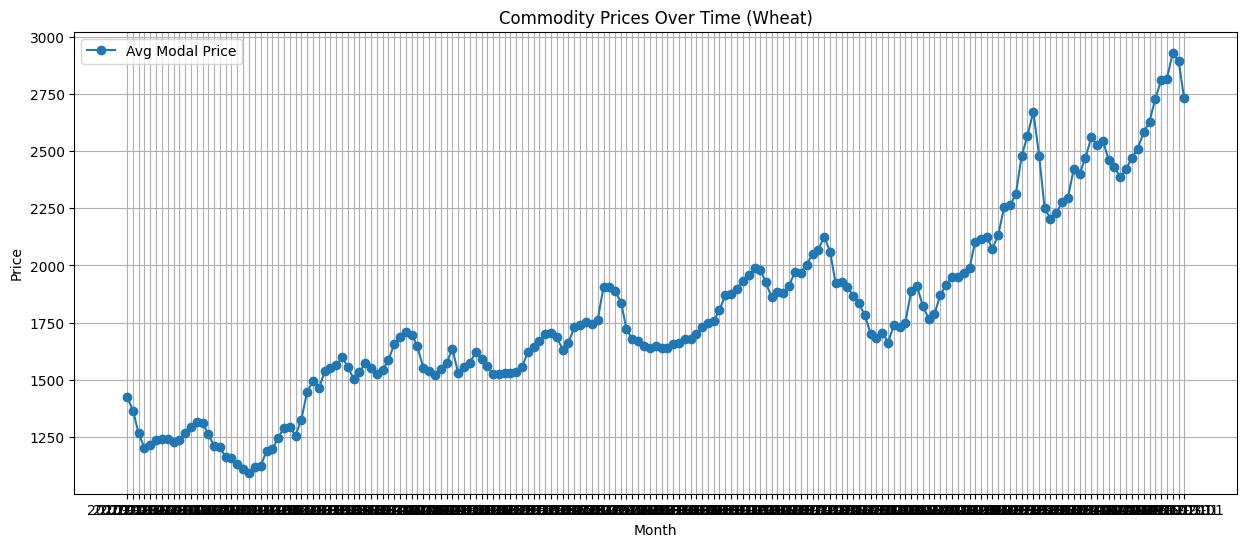

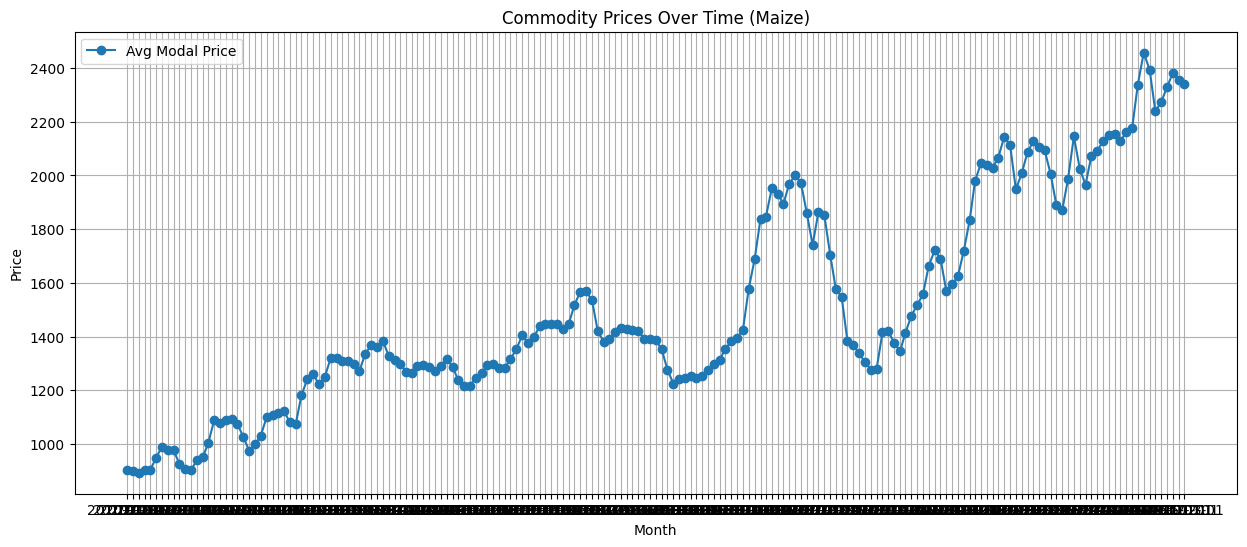

In [94]:
 
for i, crop in enumerate(crops): 
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6) ) 
    plot_data(crop, df, ax)  
  
plt.show()

# Decomposition of timeseries data

Time series decomposition helps us break down a time series dataset into three main components:

1. **Trend**: The trend component represents the long-term movement in the data, representing the underlying pattern.
2. **Seasonality**: The seasonality component represents the repeating, short-term fluctuations caused by factors like seasons or cycles.
3. **Residual (Noise)**: The residual component represents random variability that remains after removing the trend and seasonality.

**Types of Time Series Decomposition Techniques**

**Additive Decomposition**:
* Y(t)=Trend(t) + Seasonal(t) + Residual(t)
* It's suitable when the magnitude of seasonality doesn't vary with the magnitude of the time series.

**Multiplicative Decomposition**:
* Y(t)=Trend(t) * Seasonal(t) * Residual(t)
* It's suitable when the magnitude of seasonality scales with the magnitude of the time series.

In [95]:
# Use STL decomposition for additive and classical decomposition for Multiplicative 

import matplotlib.pyplot as plt  
from statsmodels.tsa.seasonal import STL  

def plot_components(df, crop):  
    ts = df[df['commodity_name'] == crop]['avg_modal_price']  
      
    result_add = STL(ts, period=12).fit()  

    fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 6), sharex=True)  

    ax[0].plot(result_add.trend, label='Additive Trend', color='blue')  
    ax[0].legend()  
    ax[0].set_title(f'Trend {crop}')  

    ax[1].plot(result_add.seasonal, label='Additive Seasonality', color='orange')  
    ax[1].legend()  
    ax[1].set_title(f'Seasonality {crop}')  

    ax[2].plot(result_add.resid, label='Additive Residual', color='green')  
    ax[2].legend()  
    ax[2].set_title(f'Residual {crop}')  

    plt.xlabel('Time')  
    plt.tight_layout()  
    plt.show()  

  

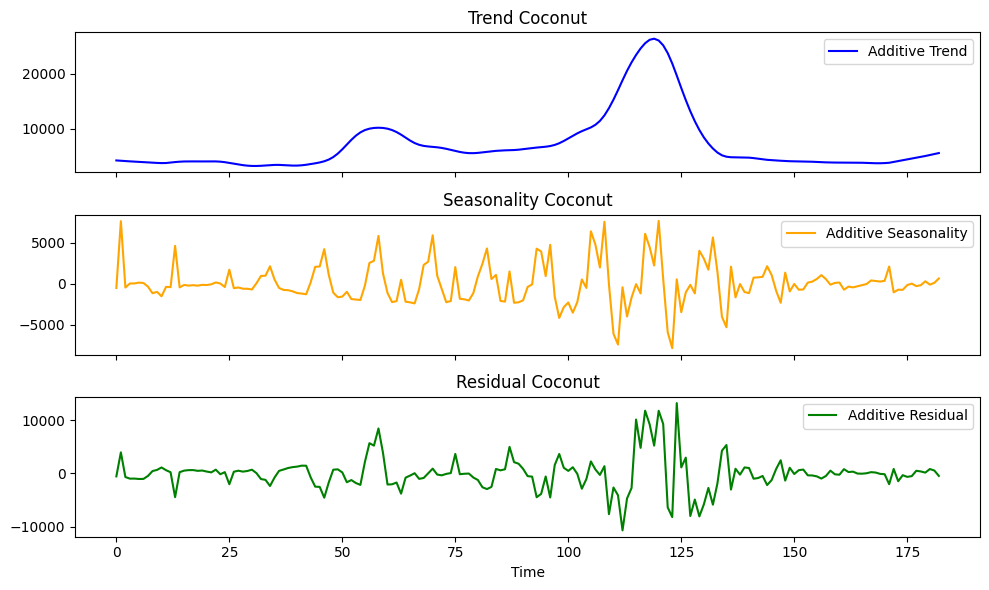

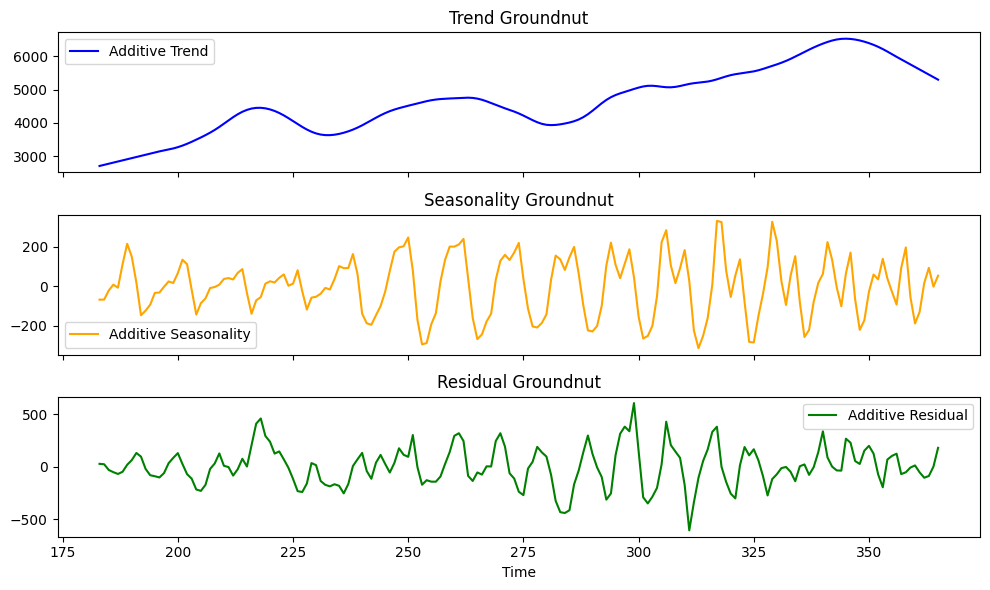

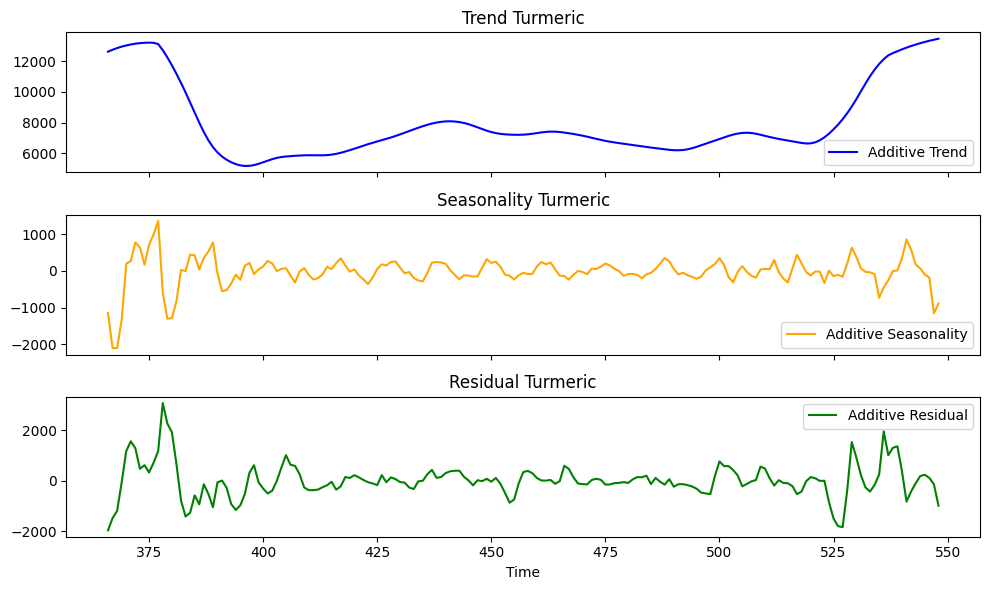

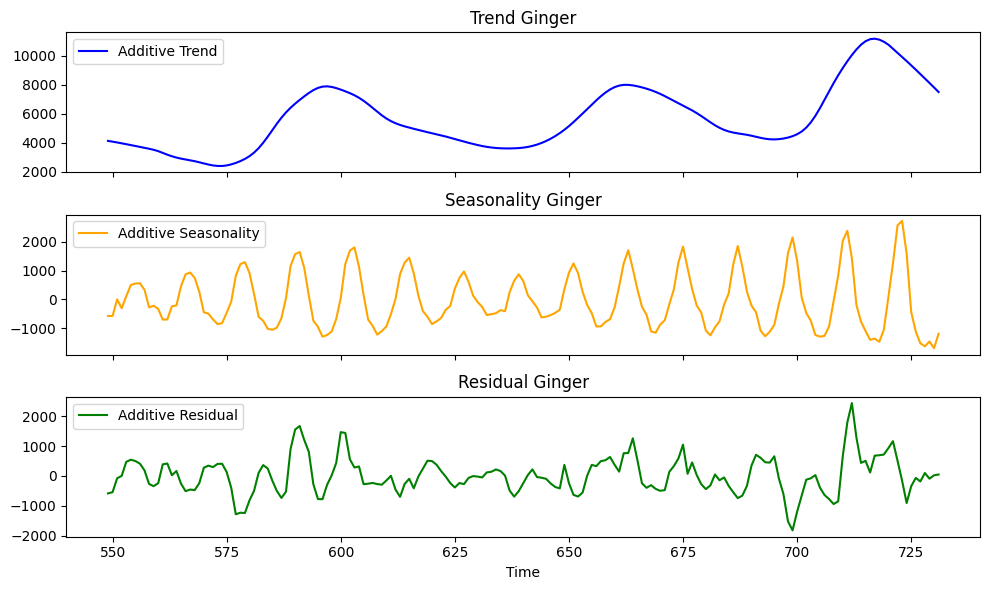

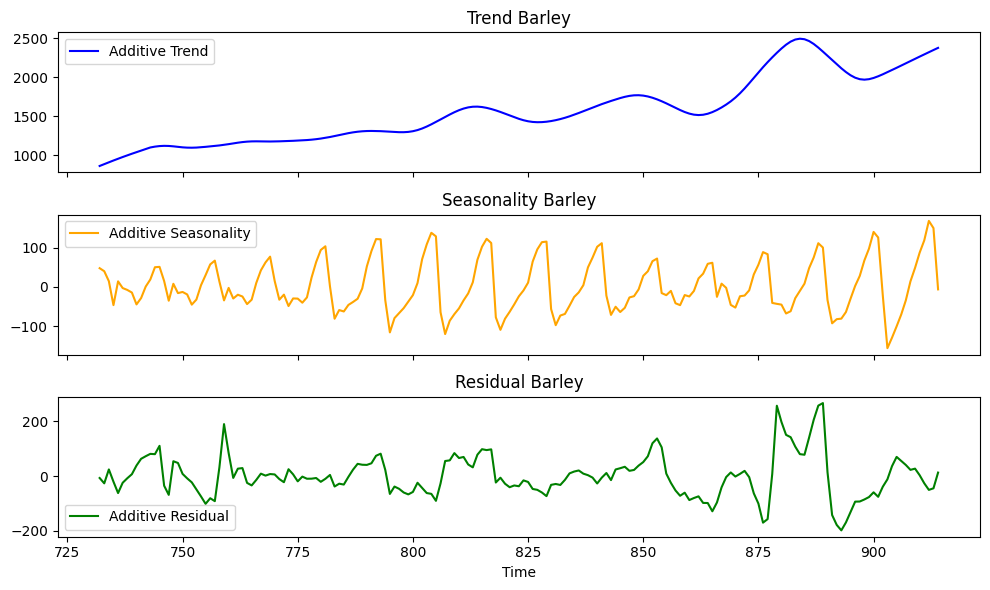

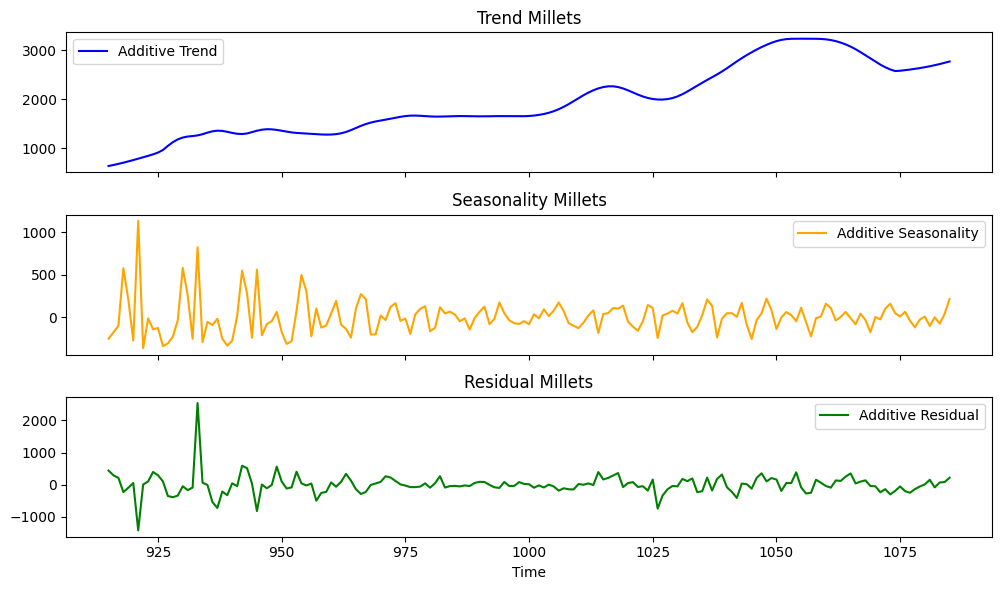

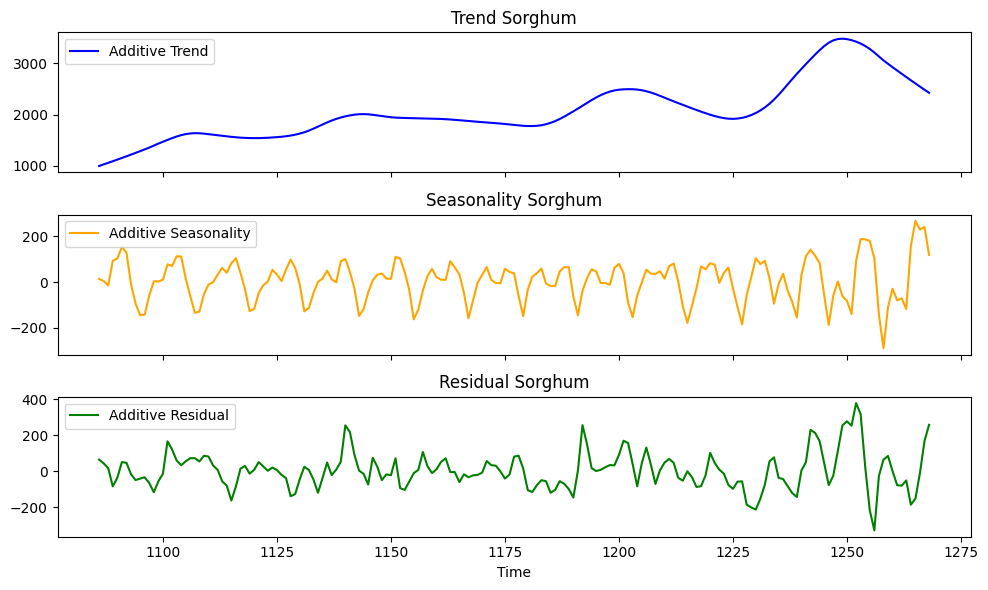

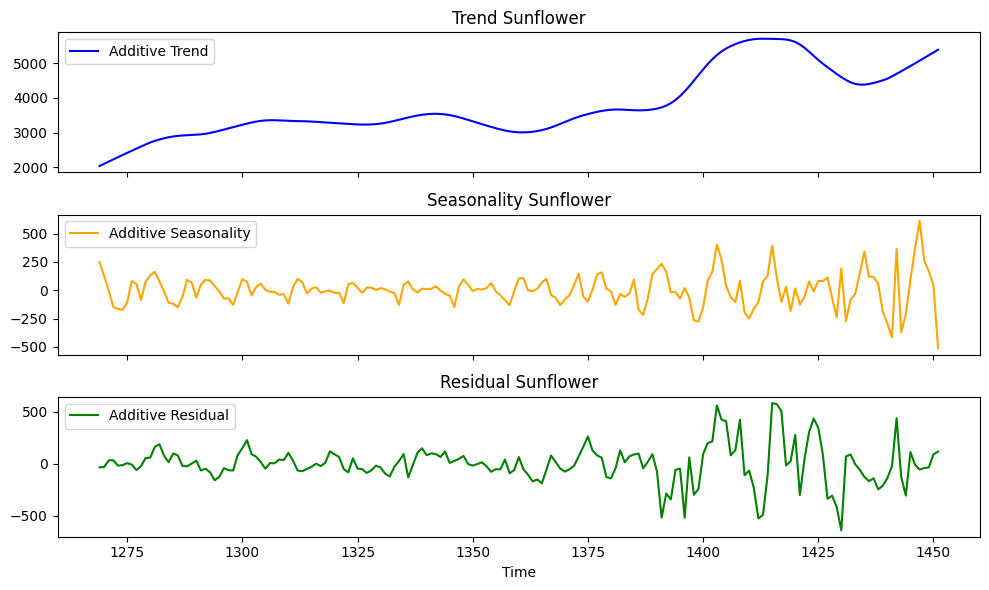

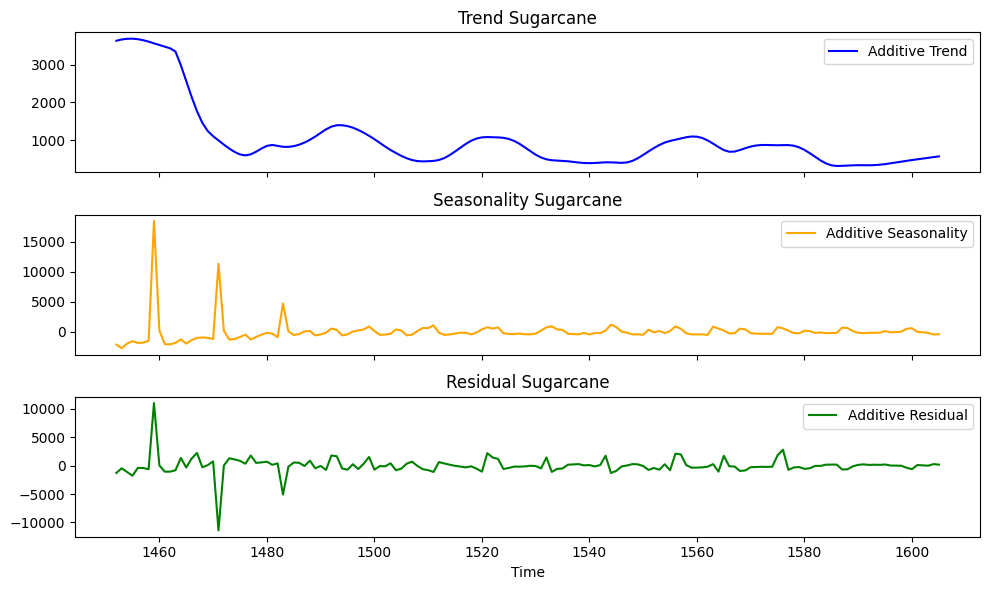

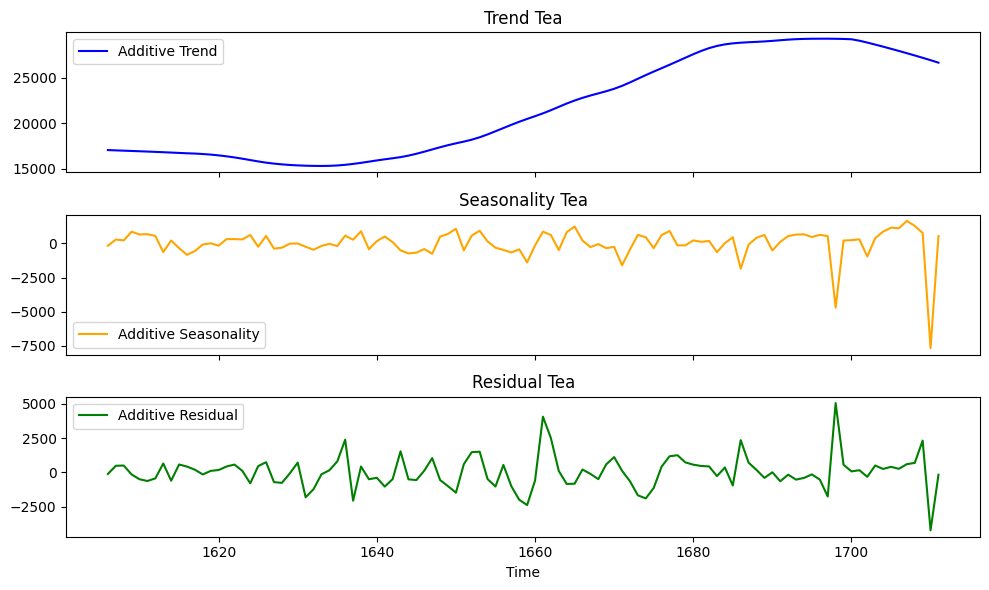

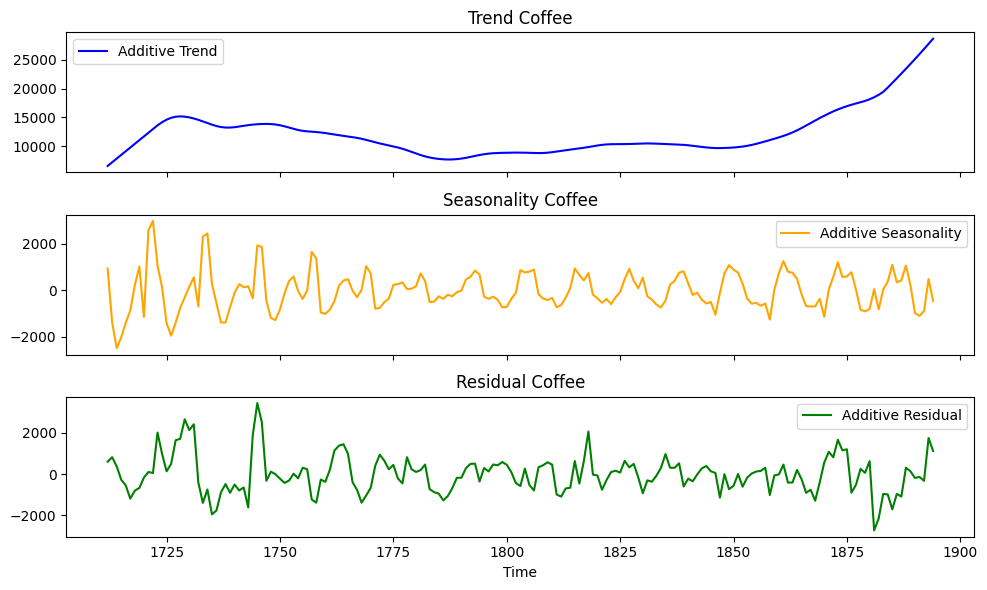

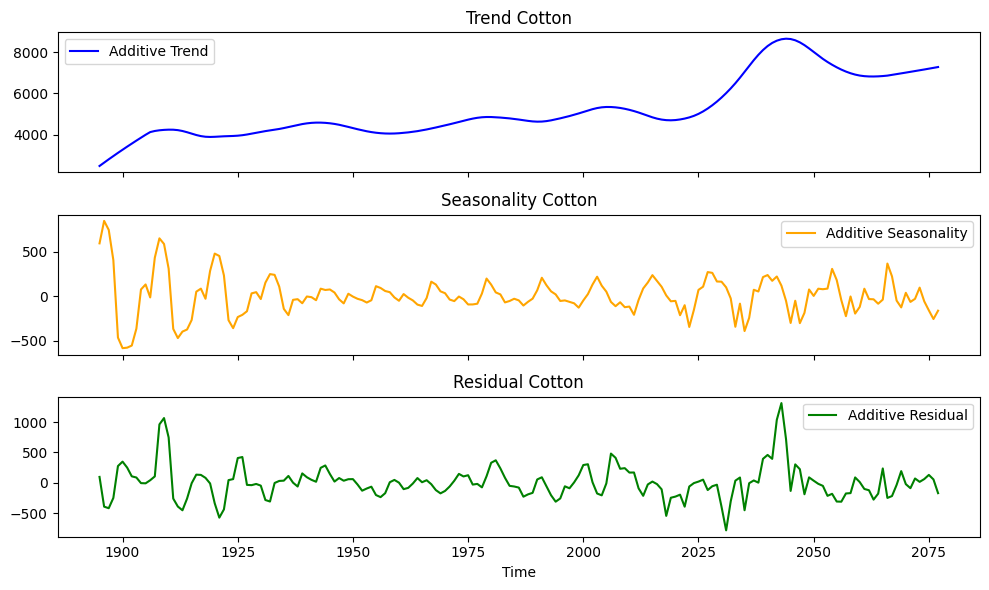

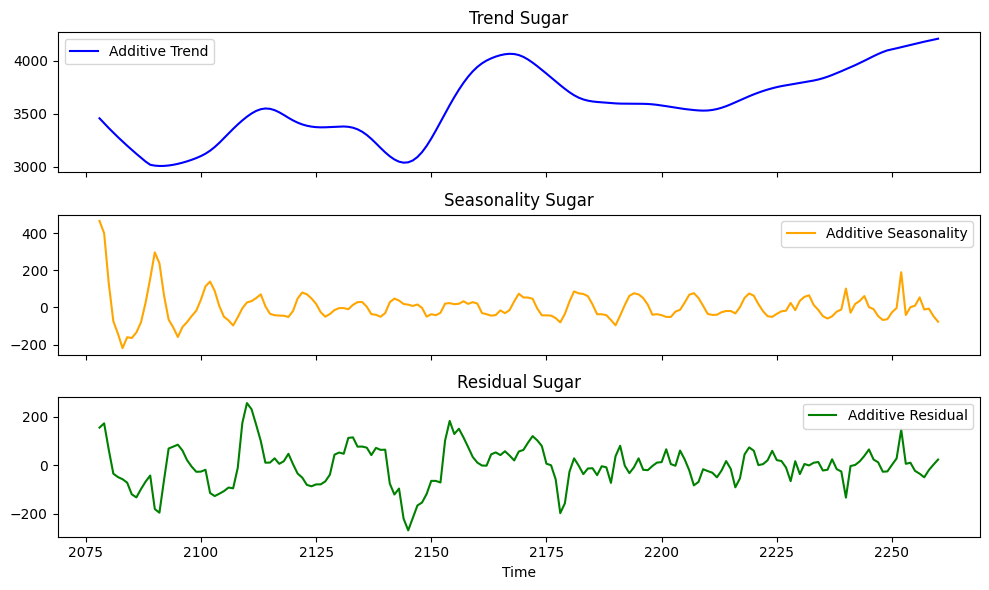

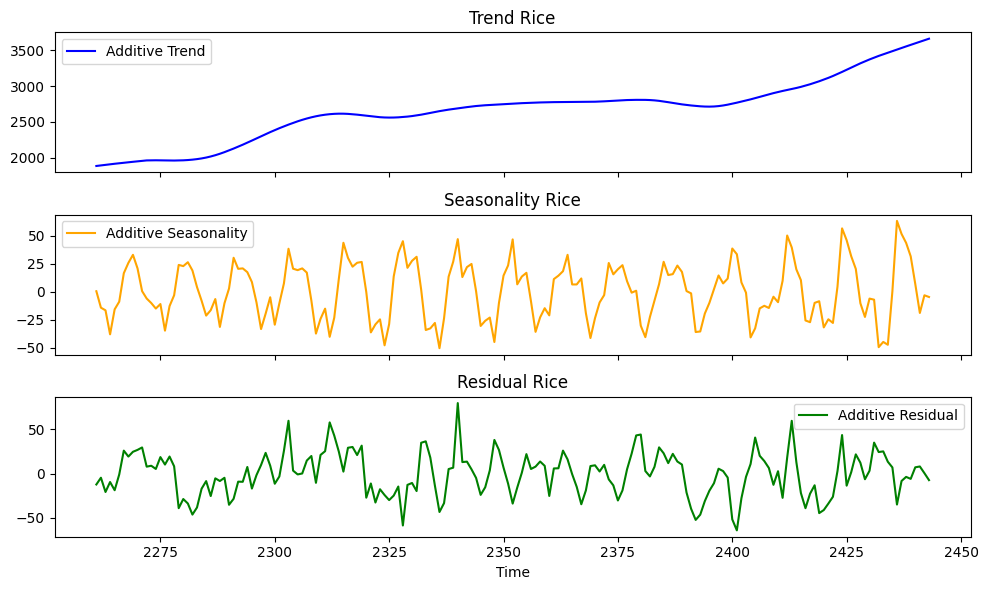

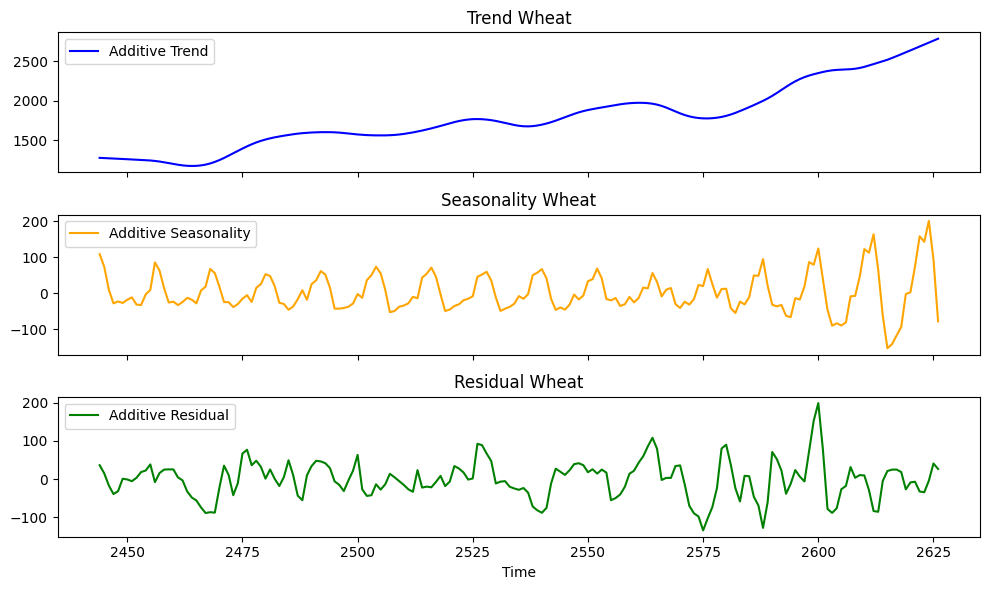

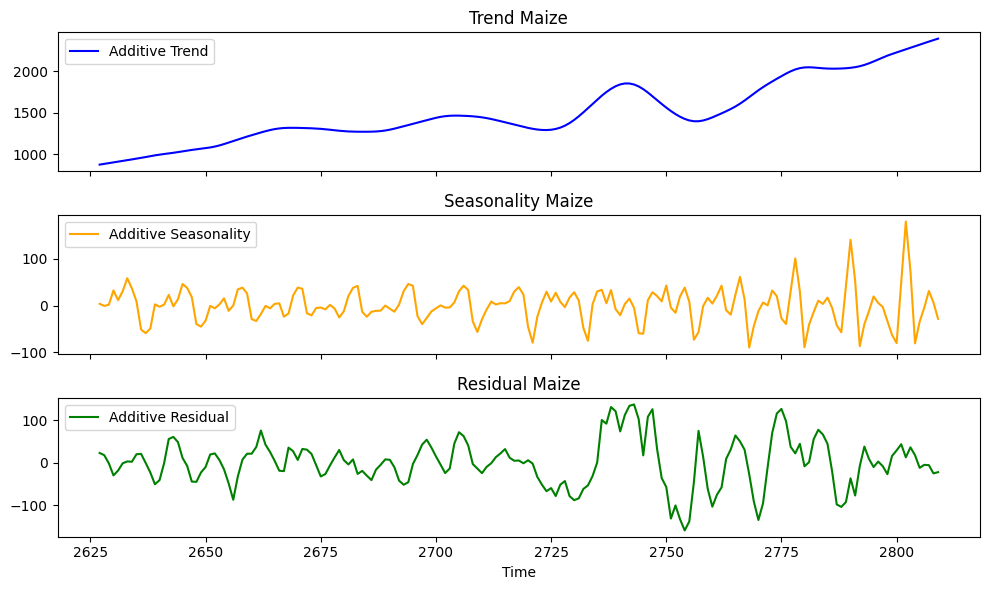

In [96]:
for crop in crops:
  plot_components(df,crop)

# Understanding Stationarity 

**Staionary data** :- A stationary series is one in which the properties – mean, variance and covariance, do not vary with time.
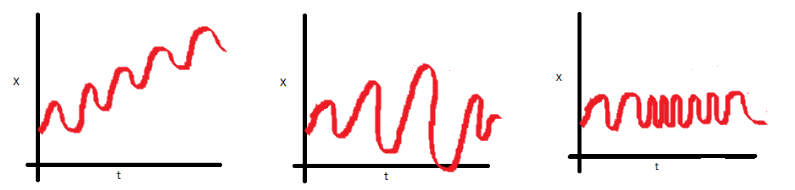
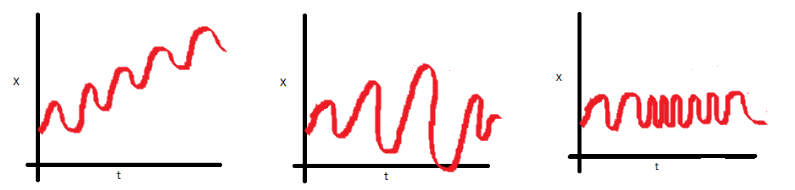

**Methods To check**

There are two tests available to test if the dataset is stationary:

**1. Augmented Dickey-Fuller (ADF) Test**

  The ADF test is the most popular statistical test. It is done with the following assumptions:

* Null Hypothesis (H0): Series is non-stationary
* Alternate Hypothesis (HA): Series is stationary
* p-value >0.05 Fail to reject (H0)
* p-value <= 0.05 Accept (H1)


In [97]:
from statsmodels.tsa.stattools import adfuller


def adf_test( df , crop):
    timeseries = df[df['commodity_name'] == crop]['avg_modal_price']
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)


In [98]:
print("Results of Dickey-Fuller Test:\n")
for crop in crops:
  print(f"ADF score for {crop}")
  adf_test(df,crop) 
  print("\n")

Results of Dickey-Fuller Test:

ADF score for Coconut
Test Statistic                  -3.602079
p-value                          0.005721
#Lags Used                       1.000000
Number of Observations Used    181.000000
Critical Value (1%)             -3.467005
Critical Value (5%)             -2.877644
Critical Value (10%)            -2.575355
dtype: float64


ADF score for Groundnut
Test Statistic                  -1.723654
p-value                          0.418968
#Lags Used                      14.000000
Number of Observations Used    168.000000
Critical Value (1%)             -3.469886
Critical Value (5%)             -2.878903
Critical Value (10%)            -2.576027
dtype: float64


ADF score for Turmeric
Test Statistic                  -4.011303
p-value                          0.001352
#Lags Used                      11.000000
Number of Observations Used    171.000000
Critical Value (1%)             -3.469181
Critical Value (5%)             -2.878595
Critical Value (10%)     

**2. Kwiatkowski–Phillips–Schmidt–Shin (KPSS) Test**

The KPSS test is conducted with the following assumptions.

* Null Hypothesis (HO): Series is trend stationary or series has no unit root.
* Alternate Hypothesis(HA): Series is non-stationary, or series has a unit root.

If the Test Statistic < Critical Value and p-value < 0.05 – Fail to Reject Null Hypothesis(HO), i.e., time series does not have a unit root, meaning it is trend stationary.

In [99]:
# Function to print out results in customised manner
from statsmodels.tsa.stattools import kpss

def kpss_test(df , crop):
    timeseries = df[df['commodity_name'] == crop]['avg_modal_price']
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [100]:
print("Results of Dickey-Fuller Test:\n")
for crop in crops:
  print(f"KPSS score for {crop}")
  adf_test(df,crop) 
  print("\n")

Results of Dickey-Fuller Test:

KPSS score for Coconut
Test Statistic                  -3.602079
p-value                          0.005721
#Lags Used                       1.000000
Number of Observations Used    181.000000
Critical Value (1%)             -3.467005
Critical Value (5%)             -2.877644
Critical Value (10%)            -2.575355
dtype: float64


KPSS score for Groundnut
Test Statistic                  -1.723654
p-value                          0.418968
#Lags Used                      14.000000
Number of Observations Used    168.000000
Critical Value (1%)             -3.469886
Critical Value (5%)             -2.878903
Critical Value (10%)            -2.576027
dtype: float64


KPSS score for Turmeric
Test Statistic                  -4.011303
p-value                          0.001352
#Lags Used                      11.000000
Number of Observations Used    171.000000
Critical Value (1%)             -3.469181
Critical Value (5%)             -2.878595
Critical Value (10%)  

# When to Choose ADF or KPSS Test?
There could be a lot of confusion on when one should use the ADF test or KPSS test and which test would give a correct result. A better solution is to apply/run both tests and makes sure that the series is truly stationary.

The following are the possible outcomes of applying both tests.

* Case 1: Both tests conclude that the given series is stationary – The series is stationary
* Case 2: Both tests conclude that the given series is non-stationary – The series is non-stationary
* Case 3: ADF concludes non-stationary, and KPSS concludes stationary – The series is trend stationary. To make the series 
  strictly stationary, we need to remove the trend in this case. Then we check the detrended series for stationarity.
* Case 4: ADF concludes stationary, and KPSS concludes non-stationary – The series is difference stationary. Differencing is to 
  be used to make series stationary. Then we check the differenced series for stationarity.

# SARIMA model 

In [101]:
df.drop(['change'],inplace=True,axis=1)

In [102]:
df.head(2)

month commodity_name  avg_modal_price  avg_min_price  avg_max_price  \
0 2010-01-01        Coconut           3169.0        2773.97        3562.30   
1 2010-02-01        Coconut          15745.7       11634.74       19899.66   

  state_name district_name calculationType  
0      India           All         Monthly  
1      India           All         Monthly

In [103]:
df.isnull().sum()  # Check for NaN values in your DataFrame  

month              0
commodity_name     0
avg_modal_price    0
avg_min_price      0
avg_max_price      0
state_name         0
district_name      0
calculationType    0
dtype: int64

In [104]:
print(crops)

['Coconut' 'Groundnut' 'Turmeric' 'Ginger' 'Barley' 'Millets' 'Sorghum'
 'Sunflower' 'Sugarcane' 'Tea' 'Coffee' 'Cotton' 'Sugar' 'Rice' 'Wheat'
 'Maize']


In [105]:
df['commodity_name'].replace({'Ginger(Dry)':'Ginger','Jowar(Sorghum)':'Sorghum' , 'Barley (Jau)':'Barley' } , inplace=True)

In [106]:
df1 = df[df['commodity_name'] == 'Maize'][['month', 'avg_modal_price']].copy()
df1['month'] = pd.to_datetime(df1['month'])
df1.set_index('month', inplace=True)
df1.sort_index(inplace=True)

In [107]:
df1.describe()

avg_modal_price
count       183.000000
mean       1506.107760
std         393.812616
min         892.990000
25%        1264.440000
50%        1387.850000
75%        1849.290000
max        2456.740000

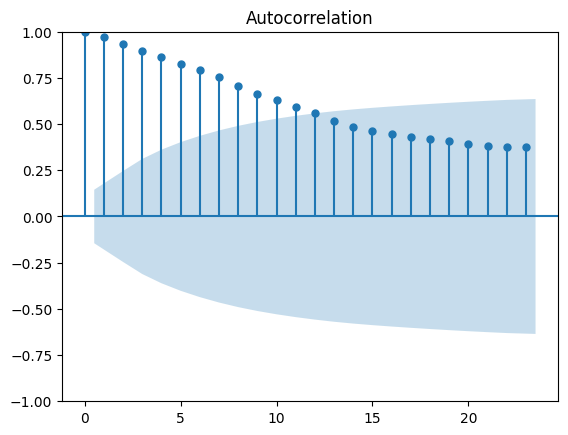

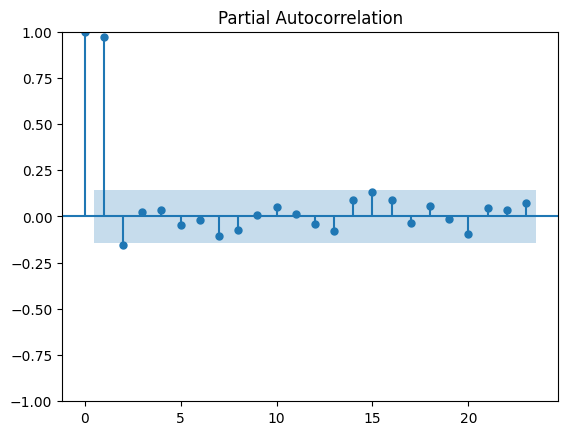

In [108]:
# acf and pacf test to analyse params 
plot_acf(df1['avg_modal_price'])
plot_pacf(df1['avg_modal_price'])
plt.show()

In [109]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [110]:
import pmdarima as pm

In [111]:
model = pm.auto_arima(df1['avg_modal_price'], 
                      seasonal=True, m=12,  # Change m based on seasonality
                      stepwise=True, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1960.198, Time=0.84 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2003.916, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1970.617, Time=0.18 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1969.025, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2005.174, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=1973.205, Time=0.53 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=1971.225, Time=0.62 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=1961.012, Time=1.22 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=1960.822, Time=1.31 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=1976.871, Time=0.23 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=1973.218, Time=1.18 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=1968.077, Time=1.15 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=1.39 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=1956.740, Time=0.67 sec
 ARIMA(1,1,2)(0,0,1)[12]

In [112]:
print(model.order)
print(model.seasonal_order)

(0, 1, 1)
(1, 0, 1, 12)


In [ ]:
 
p, d, q = (0, 1, 1) 
P, D, Q, s = (1, 0, 1, 12)  # Seasonal parameters (monthly seasonality)  

# Split the data into training and validation sets  
train_size = int(0.9 * len(df1))  # Use 90% for training  
train = df1.iloc[:train_size]  # Training data  
valid = df1.iloc[train_size:]  # Validation data  
print(train.index.shape)

(164,)


                                     SARIMAX Results                                      
Dep. Variable:                    avg_modal_price   No. Observations:                  164
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -865.074
Date:                            Thu, 27 Mar 2025   AIC                           1738.147
Time:                                    06:53:16   BIC                           1750.522
Sample:                                01-01-2010   HQIC                          1743.171
                                     - 08-01-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4090      0.055      7.438      0.000       0.301       0.517
ar.S.L12       0.9996      0.042   

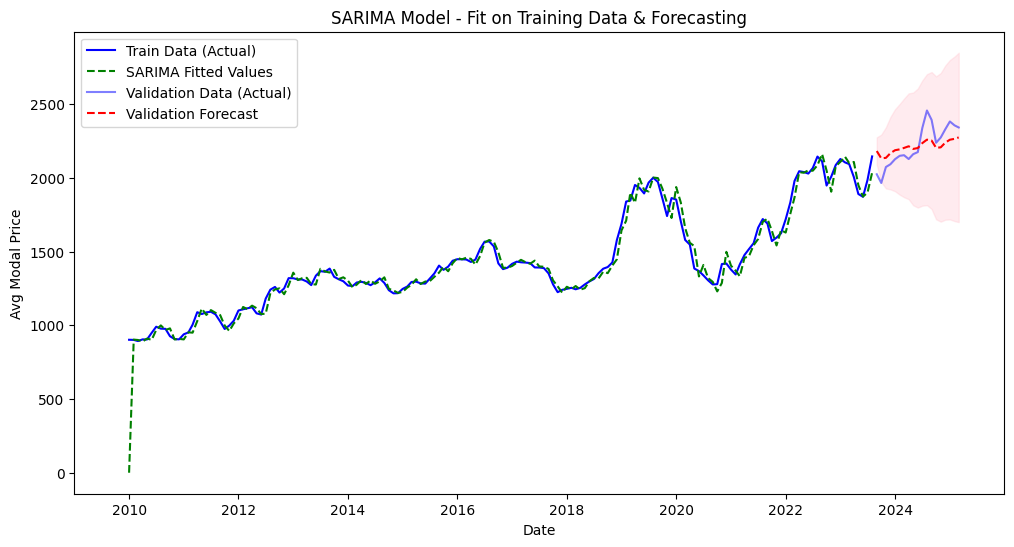

In [114]:

# Fit the SARIMA Model on Training Data  
model = SARIMAX(train['avg_modal_price'],   
                order=(p, d, q),   
                seasonal_order=(P, D, Q, s))  

results = model.fit()  

# Print model summary  
print(results.summary())  

# --- In-Sample Predictions (How model fits training data) ---  
train['SARIMA_Fitted'] = results.fittedvalues  # Get fitted values from the model  

# --- Forecasting ---  
forecast_steps = len(valid)  # Forecast the same number of steps as in the validation set  
forecast = results.get_forecast(steps=forecast_steps)  # Generate forecast  
forecast_ci = forecast.conf_int()  # Compute confidence intervals  

# --- Plotting ---  
plt.figure(figsize=(12, 6))  

# Plot the training data with fitted values  
plt.plot(train.index, train['avg_modal_price'], label='Train Data (Actual)', color='blue')  
plt.plot(train.index, train['SARIMA_Fitted'], label='SARIMA Fitted Values', color='green', linestyle='dashed')  

# Plot validation data and forecast  
plt.plot(valid.index, valid['avg_modal_price'], label='Validation Data (Actual)', color='blue', alpha=0.5)  
plt.plot(valid.index, forecast.predicted_mean, label='Validation Forecast', color='red', linestyle='dashed')  
plt.xlim(pd.Timestamp("2009-01-01"), pd.Timestamp("2025-12-31"))
# Plot confidence intervals  
plt.fill_between(forecast_ci.index,  
                 forecast_ci.iloc[:, 0],  
                 forecast_ci.iloc[:, 1],  
                 color='pink', alpha=0.3)  

# Axis labels and title  
plt.xlabel('Date')  
plt.ylabel('Avg Modal Price')  
plt.title('SARIMA Model - Fit on Training Data & Forecasting')  
plt.legend()  
plt.show()  

In [115]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Actual vs. Predicted values for validation set
y_true = valid['avg_modal_price']  # Actual values
y_pred = forecast.predicted_mean  # Forecasted values

# Calculate MSE
mse = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Calculate MAE
mae = mean_absolute_error(y_true, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Calculate R² Score
r2 = r2_score(y_true, y_pred)
print(f"R² Score: {r2:.4f}")


Mean Squared Error (MSE): 10049.12
Mean Absolute Error (MAE): 88.38
R² Score: 0.4512


In [116]:
import joblib

In [117]:
stationary_crops = ["Coconut", "Turmeric", "Ginger (Dry)", "Sugarcane"]

non_stationary_crops = ["Groundnut", "Barley (Jau)", "Millets", "Jowar (Sorghum)", 
                        "Sunflower", "Tea", "Coffee", "Cotton", "Sugar", 
                        "Rice", "Wheat", "Maize"]


In [119]:
!rm -rf /kaggle/working/*


Processing crop: Coconut ...
Best SARIMA params for Coconut: (2, 0, 0) x (1, 0, 0, 12)


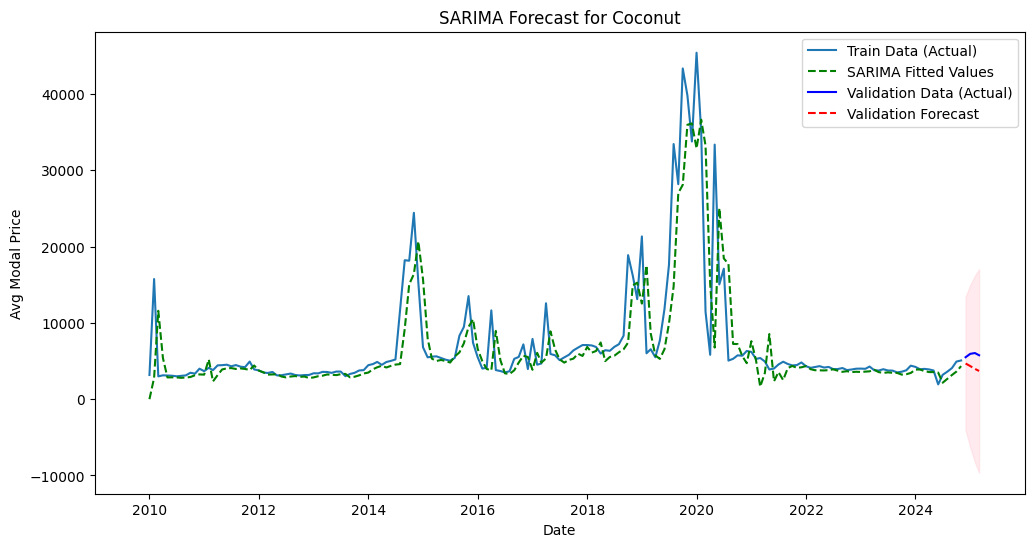

MAE for Coconut: 1639.88
--------------------------------------------------
Processing crop: Groundnut ...
Best SARIMA params for Groundnut: (0, 1, 1) x (0, 0, 0, 12)


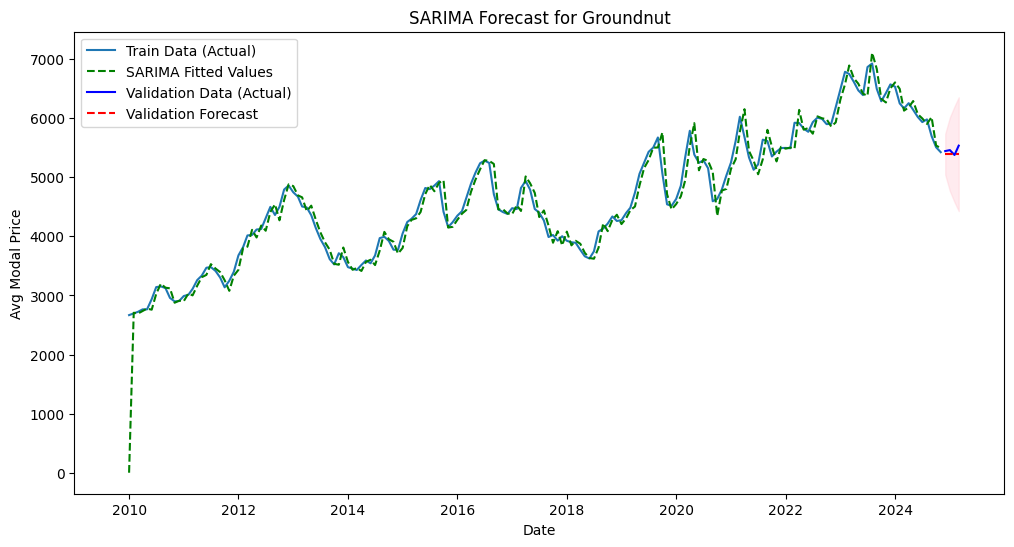

MAE for Groundnut: 70.03
--------------------------------------------------
Processing crop: Turmeric ...
Best SARIMA params for Turmeric: (2, 0, 0) x (0, 0, 0, 12)


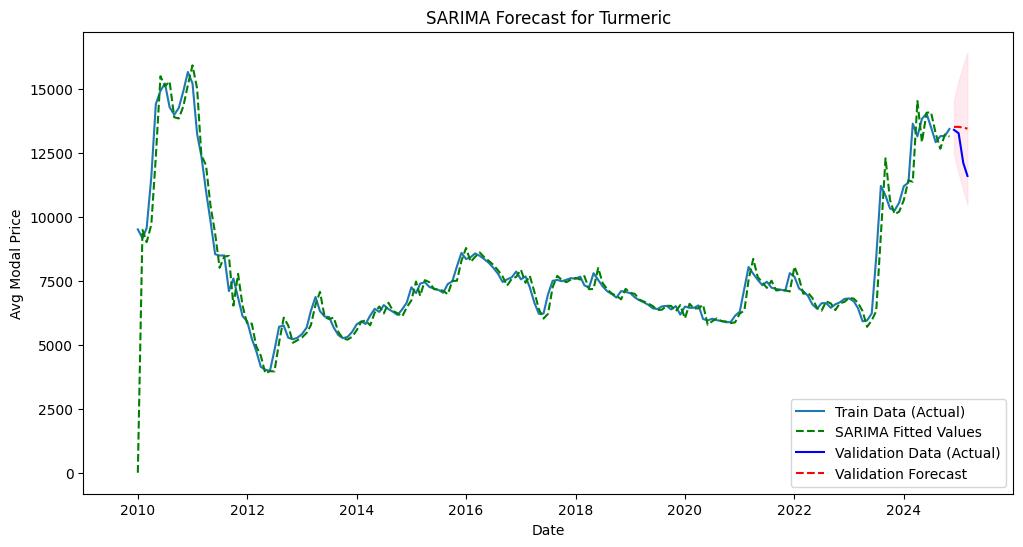

MAE for Turmeric: 898.32
--------------------------------------------------
Processing crop: Ginger ...
Best SARIMA params for Ginger: (1, 1, 0) x (1, 0, 1, 12)


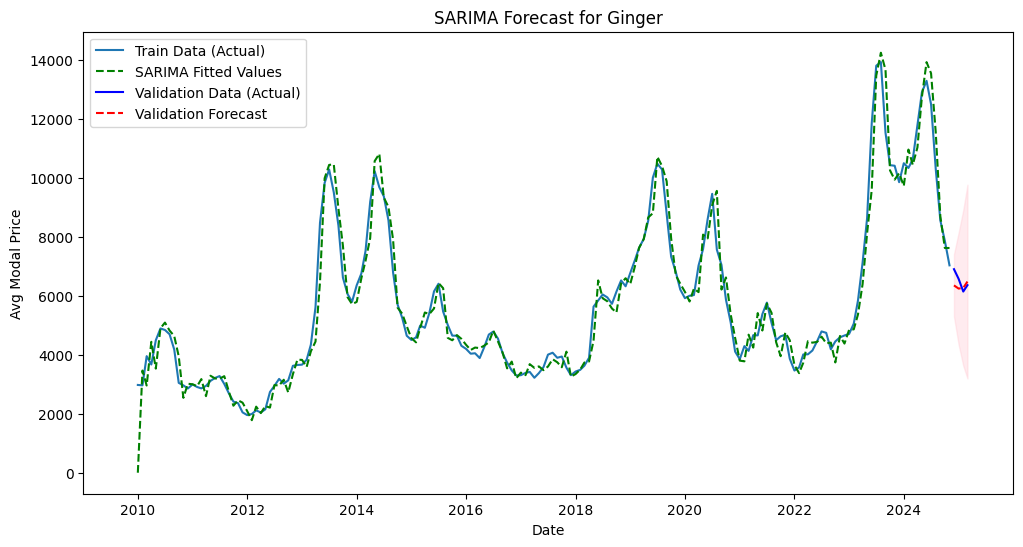

MAE for Ginger: 281.84
--------------------------------------------------
Processing crop: Barley ...
Best SARIMA params for Barley: (0, 1, 1) x (1, 0, 0, 12)


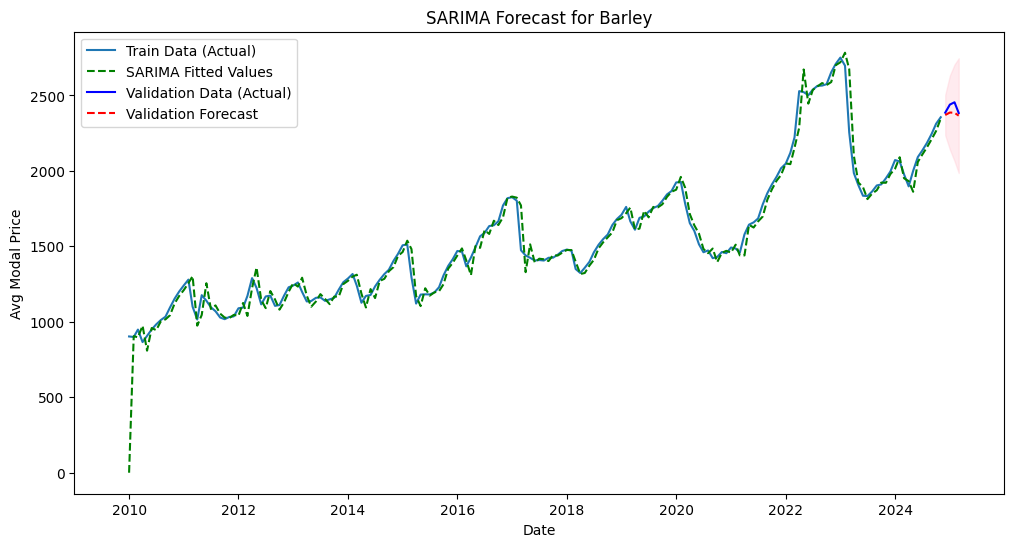

MAE for Barley: 38.84
--------------------------------------------------
Processing crop: Millets ...
Best SARIMA params for Millets: (1, 1, 1) x (0, 0, 0, 12)


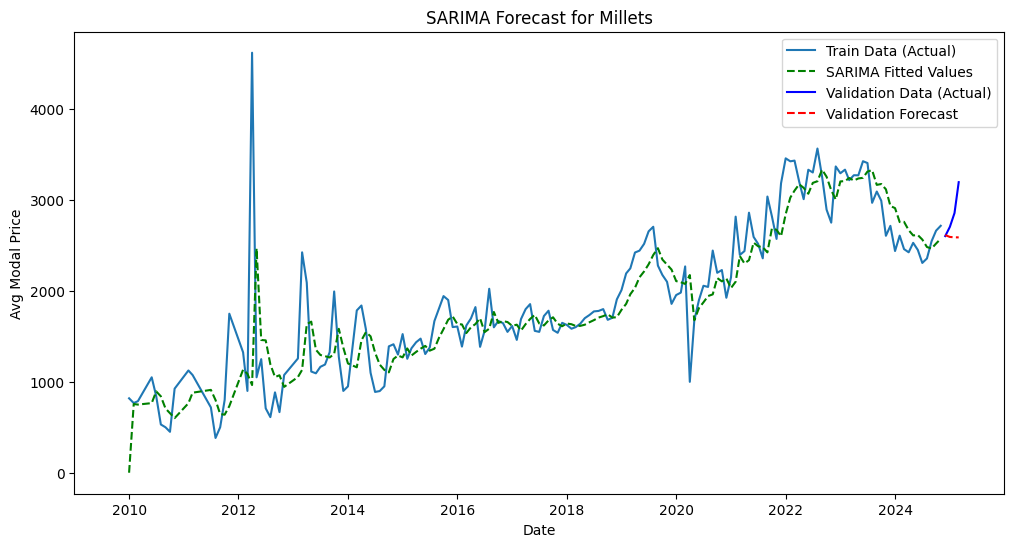

MAE for Millets: 249.23
--------------------------------------------------
Processing crop: Sorghum ...
Best SARIMA params for Sorghum: (0, 1, 1) x (0, 0, 2, 12)


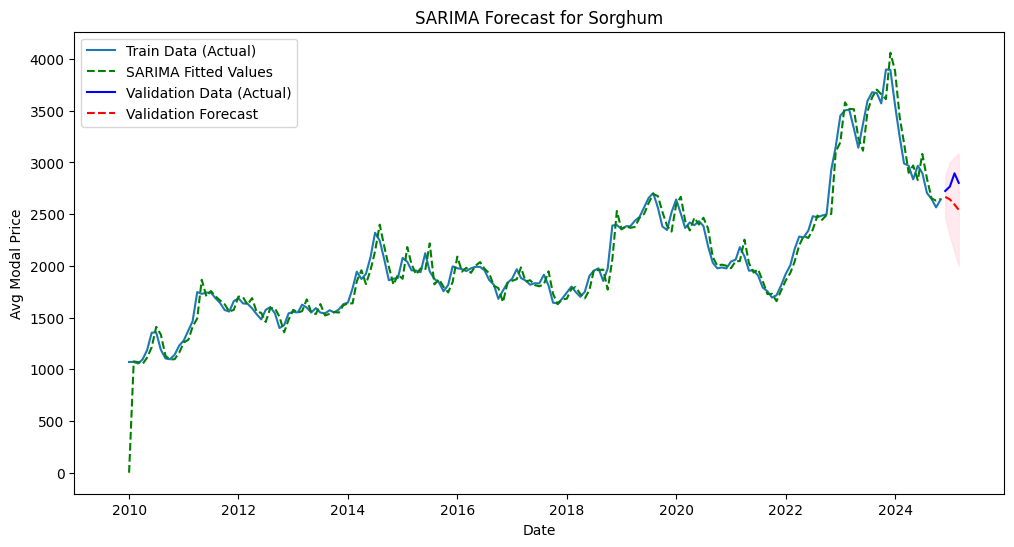

MAE for Sorghum: 185.76
--------------------------------------------------
Processing crop: Sunflower ...
Best SARIMA params for Sunflower: (0, 1, 1) x (2, 0, 2, 12)


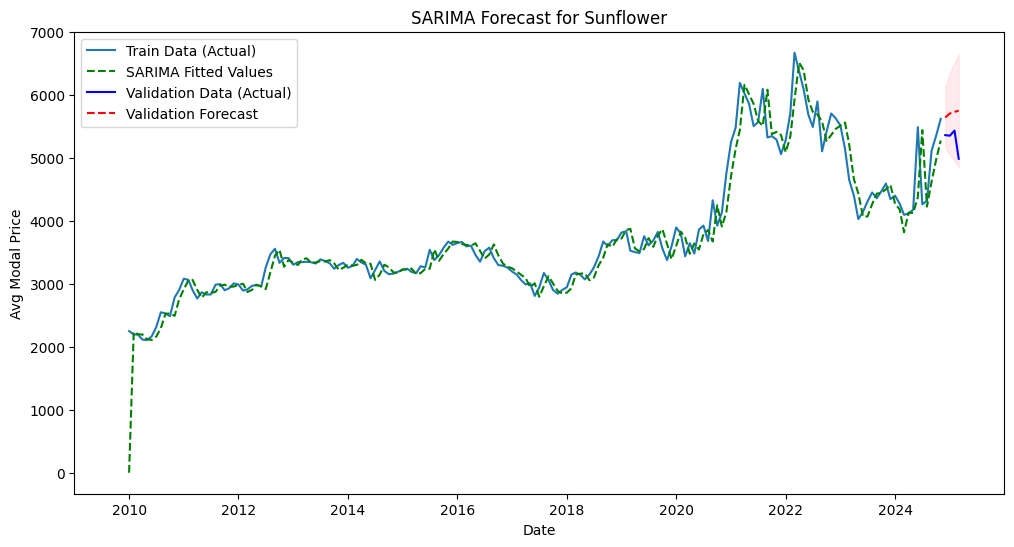

MAE for Sunflower: 424.24
--------------------------------------------------
Processing crop: Sugarcane ...
Best SARIMA params for Sugarcane: (1, 0, 0) x (0, 0, 0, 12)


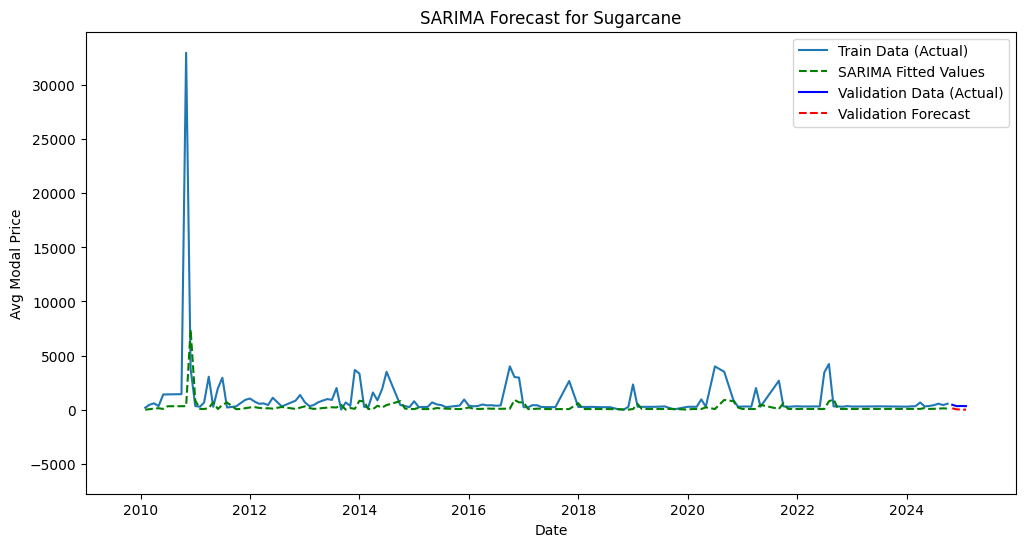

MAE for Sugarcane: 319.60
--------------------------------------------------
Processing crop: Tea ...
Best SARIMA params for Tea: (0, 1, 1) x (0, 0, 0, 12)


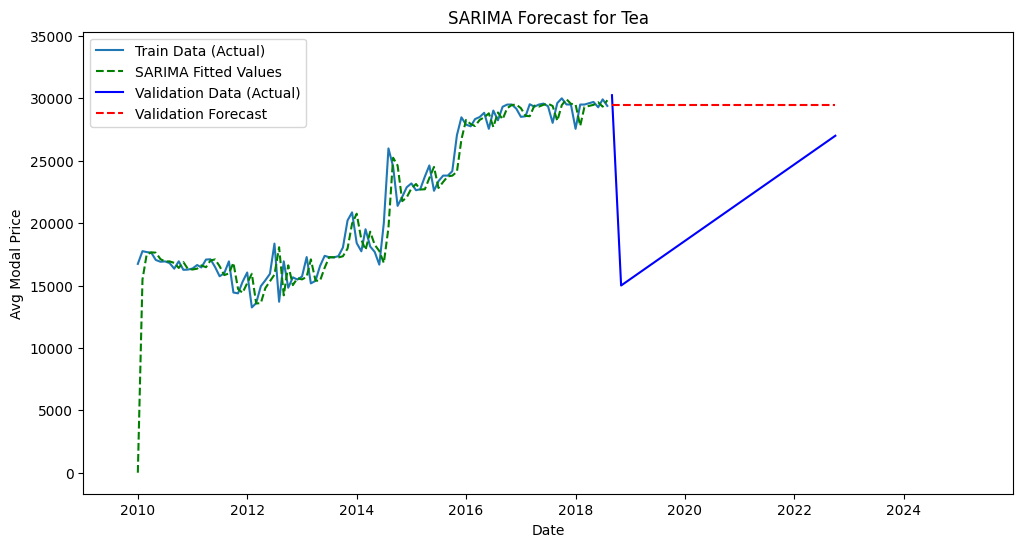

MAE for Tea: 5898.31
--------------------------------------------------
Processing crop: Coffee ...
Best SARIMA params for Coffee: (0, 1, 0) x (1, 0, 1, 12)


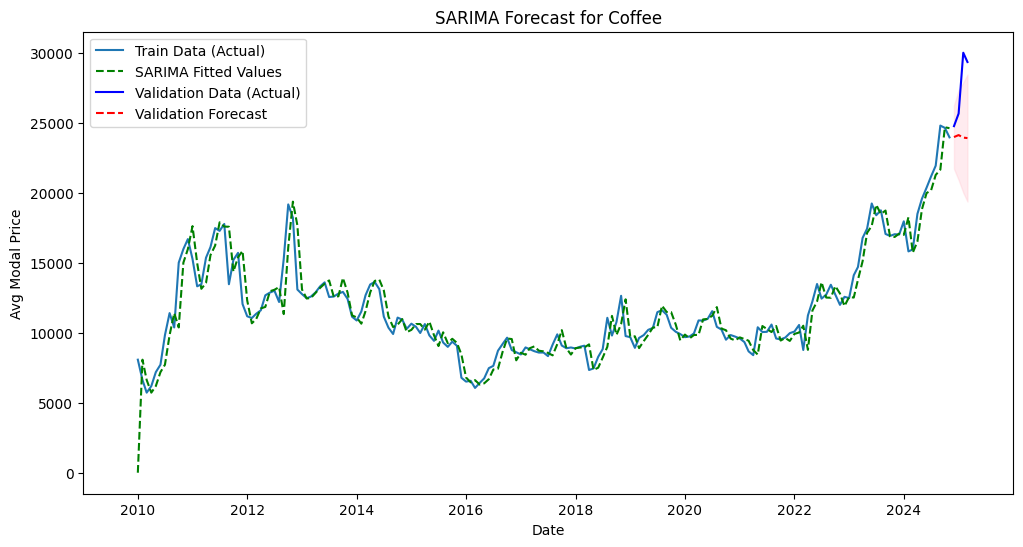

MAE for Coffee: 3455.36
--------------------------------------------------
Processing crop: Cotton ...
Best SARIMA params for Cotton: (0, 1, 1) x (0, 0, 0, 12)


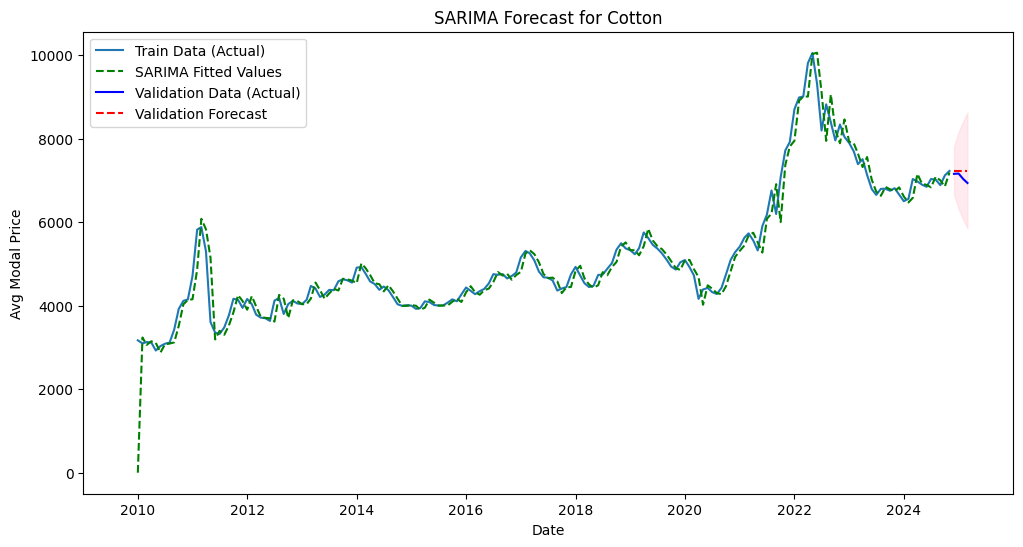

MAE for Cotton: 164.18
--------------------------------------------------
Processing crop: Sugar ...
Best SARIMA params for Sugar: (1, 1, 0) x (0, 0, 0, 12)


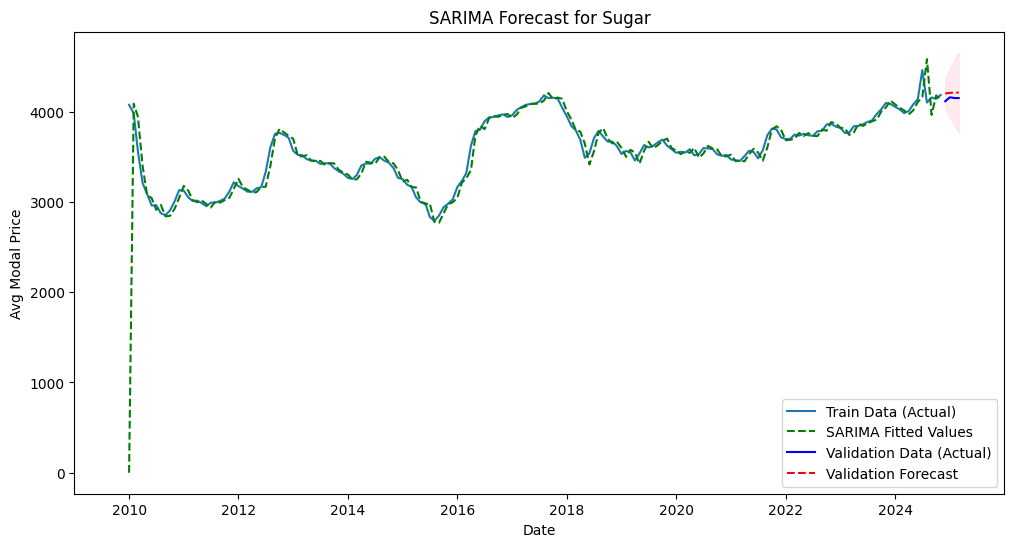

MAE for Sugar: 63.82
--------------------------------------------------
Processing crop: Rice ...
Best SARIMA params for Rice: (1, 1, 1) x (1, 0, 2, 12)


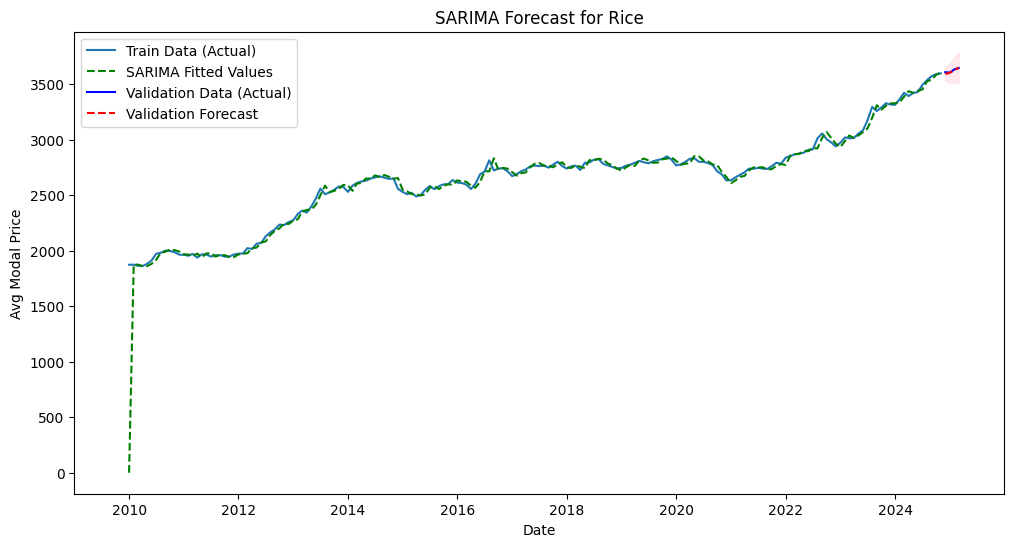

MAE for Rice: 6.39
--------------------------------------------------
Processing crop: Wheat ...
Best SARIMA params for Wheat: (0, 1, 1) x (1, 0, 1, 12)


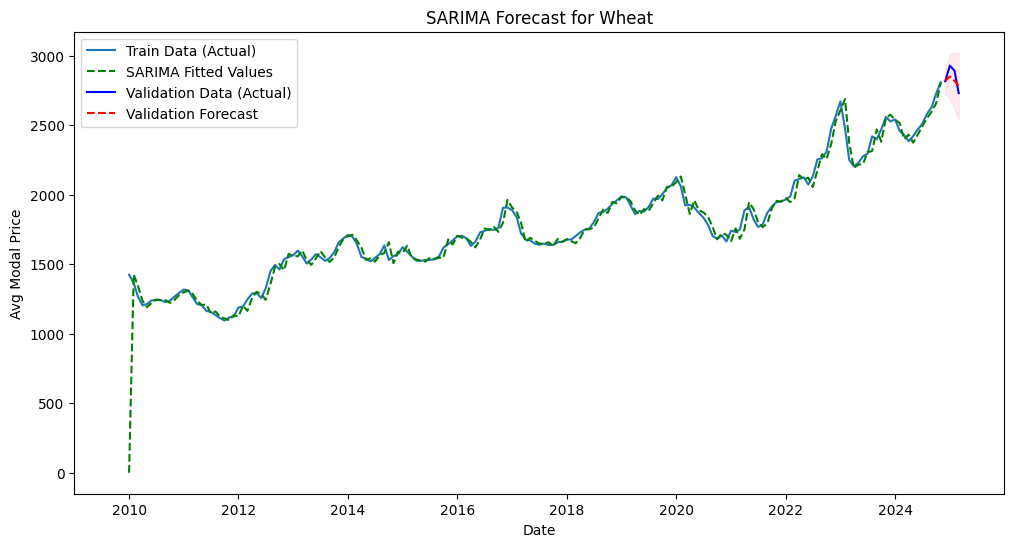

MAE for Wheat: 51.94
--------------------------------------------------
Processing crop: Maize ...
Best SARIMA params for Maize: (0, 1, 1) x (1, 0, 1, 12)


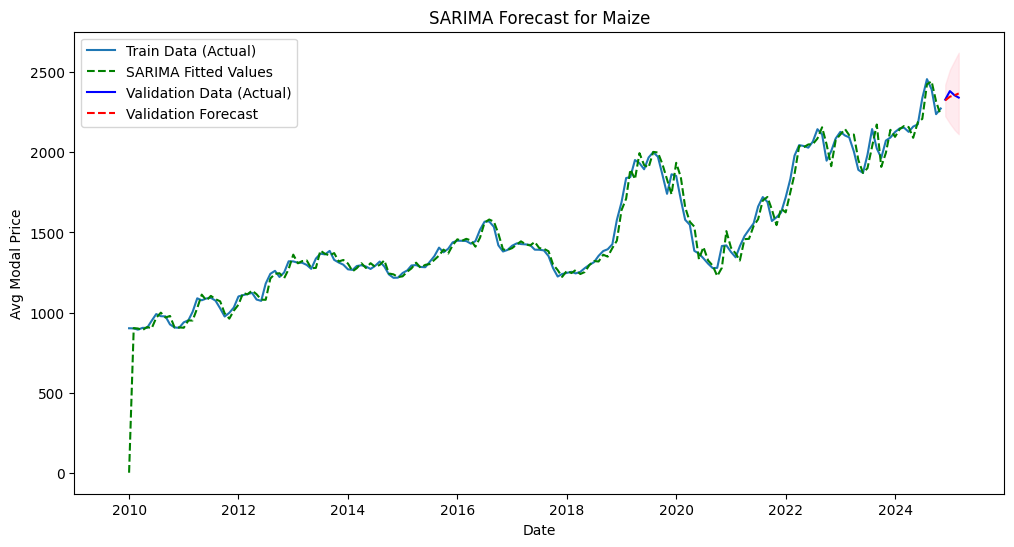

MAE for Maize: 16.40
--------------------------------------------------


In [120]:

for crop in crops:
    print(f"\033[1mProcessing crop: {crop} ...\033[0m")
    
    # Filter data for the specific crop
    df_crop = df[df['commodity_name'] == crop][['month', 'avg_modal_price']].copy()
    df_crop.set_index('month', inplace=True)
    df_crop.sort_index(inplace=True)


    # Use auto_arima to select the best SARIMA parameters
    best_model = pm.auto_arima(df_crop['avg_modal_price'],
                               seasonal=True, m=12,
                               stepwise=True, trace=False, suppress_warnings=True)
    p, d, q = best_model.order
    P, D, Q, s = best_model.seasonal_order
    print(f"Best SARIMA params for {crop}: ({p}, {d}, {q}) x ({P}, {D}, {Q}, {s})")

    # Split data into train and validation sets (90% train, 10% validation)
    train_size = int(0.98 * len(df_crop))  
    train = df_crop.iloc[:train_size]  
    valid = df_crop.iloc[train_size:]  

    # Fit SARIMA Model on Training Data
    model = SARIMAX(train['avg_modal_price'], 
                    order=(p, d, q), 
                    seasonal_order=(P, D, Q, s))
    results = model.fit()

    # Store fitted values
    train['SARIMA_Fitted'] = results.fittedvalues  

    # --- Forecasting ---
    forecast_steps = len(valid)  
    forecast = results.get_forecast(steps=forecast_steps)
    forecast_ci = forecast.conf_int()

    # --- Plotting ---
    plt.figure(figsize=(12, 6))
    plt.plot(train.index, train['avg_modal_price'], label='Train Data (Actual)')
    plt.plot(train.index, train['SARIMA_Fitted'], label='SARIMA Fitted Values', color='green', linestyle='dashed')
    plt.plot(valid.index, valid['avg_modal_price'], label='Validation Data (Actual)', color='blue')
    plt.plot(valid.index, forecast.predicted_mean, label='Validation Forecast', color='red', linestyle='dashed')
    plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)

    plt.xlabel("Date")
    plt.ylabel("Avg Modal Price")
    plt.xlim(pd.Timestamp("2009-01-01"), pd.Timestamp("2025-12-31"))
    plt.title(f"SARIMA Forecast for {crop}")
    plt.legend()
    plt.show()

    joblib.dump(model , f'{crop}_price_prediction.joblib')
    # Evaluate model performance
    mae = mean_absolute_error(valid['avg_modal_price'], forecast.predicted_mean)
    print(f"MAE for {crop}: {mae:.2f}")
    print("-" * 50)


# Conclusion & Next Steps
In this notebook, we explored time series forecasting using SARIMA and LSTM. We followed these key steps:

✅ Data Preprocessing: Handled missing values, outliers, and ensured stationarity.

✅ Exploratory Data Analysis (EDA): Identified trends, seasonality, and patterns in the data.

✅ Model Selection: Used SARIMA/ARIMA with optimal parameters to improve forecasting accuracy.

✅ Evaluation: plot the model performance.

Areas for Improvement & Future Work
While the results are promising, there's always room for improvement! Here are a few ideas:

🔹 Try other models: Compare SARIMA with Prophet, LSTM, or XGBoost for better forecasting.

🔹 Hyperparameter tuning: Fine-tune the SARIMA parameters further for better accuracy.

🔹 Feature engineering: Add external factors like holidays, events, or weather data to improve predictions.

🔹 More robust evaluation: Use cross-validation techniques to validate model performance.

I'd love to hear your suggestions! If you have any feedback or ideas to improve this notebook, please share them in the comments.

Let me know:
💡 What worked well?

💡 What can be improved?

💡 Any other models or techniques worth trying?


Thankyou  for visiting my notebook 
